In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
print(df.shape)        # rows, columns
df.info()              # column data types, non-null counts
df.describe(include='all')  # summary stats (numeric & categorical if you use include='all')

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Lets look for missing values before we make the model

In [18]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
if df['TotalCharges'].isna().sum() > 0:
  print('Warning: There are some non-numeric TotalCharges values. Lets drop these rows.')
  df.dropna(subset=['TotalCharges'], inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.drop(columns=['customerID'], inplace=True)

In [21]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# one hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())
print(df_encoded.info())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

In [22]:
# lets split and train
X = df_encoded.drop('Churn', axis=1).astype(np.float64).values
y = df_encoded['Churn'].astype(np.float64).values.reshape(-1,1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Features shape: (7032, 30)
Target shape: (7032, 1)
X_train shape: (5625, 30)
y_train shape: (5625, 1)
X_test shape: (1407, 30)
y_test shape: (1407, 1)


In [23]:



# np.random.seed(42)

# # Lets train you split X and y

# #input dim, hidden and outpuit

# input_dim = X_train.shape[1]   # Number of features
# hidden_dim = 64   # nuerons in hidden layer
# output_dim = 1    # Binary Classification

# # Initialize the weights and biases
# W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2 / input_dim) #30, 16
# b1 = np.zeros((1, hidden_dim)) # 1,16
# W2 = np.random.randn(hidden_dim, output_dim) * 0.01 # 16, 1
# b2 = np.zeros((1, output_dim))

# # activation function
# def relu(z):
#   return np.maximum(0, z)

# def relu_deriv(z):
#   return np.where(z > 0, 1, 0)

# def sigmoid(z):
#   return 1 / (1 + np.exp(-z))

# # forward pass lets compute the activations for each layer
# def forward_pass(X, W1, b1, W2, b2):
#   Z1 = X.dot(W1) + b1 # Hidden Layer linear combination
#   A1 = relu(Z1)
#   Z2 = A1.dot(W2) + b2
#   A2 = sigmoid(Z2)
#   return Z1, A1, Z2, A2

# # compute binary cross entropy-loss

# def compute_loss(y, A2):
#   m = y.shape[0]
#   eps = 1e-15 #avoid log 0
#   A2 = np.clip(A2, eps, 1 - eps)
#   loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))
#   return loss

# # backprop applying the chain rule

# def backward_pass(X, y, Z1, A1, Z2, A2, W2):
#   m = X.shape[0]

#   #Were are going to compuite the derivative loss with respect to Z2
#   # Using the chain rule: dL/dA2 * dA2/dZ2 this is quoted in the calc rules

#   dZ2 = A2 - y.reshape(-1, 1) # shape (m, 1)

#   # gradients  for W2 and b2
#   dW2 = (A1.T).dot(dZ2) / m # shape is hidden_dim, 1)
#   db2 = np.sum(dZ2, axis=0, keepdims=True) / m # shape is (1, 1)

#   #Propagate the gradient to the hidden layer
#   # dL/dA1 = dZ2 * W2^T (chain rule)
#   dA1 = dZ2.dot(W2.T) # shape (m, hidden_dim)

#   # dL/dZ1 = dL/dA1 * dA1/dZ1 (chain rule here) and dA1/dZ1 = ReLu derivative
#   dZ1 = dA1 * relu_deriv(Z1)

#   # Gradients for w1 and b1
#   dW1 = (X.T).dot(dZ1) / m # shape input_dimn, hiddein_dim)
#   db1 = np.sum(dZ1, axis=0, keepdims=True) / m # shape (1, hidden_dim)

#   return dW1, db1, dW2, db2


# # update parameters using gradient descent
# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
#   W1 -= learning_rate * dW1
#   b1 -= learning_rate * db1
#   W2 -= learning_rate * dW2
#   b2 -= learning_rate * db2
#   return W1, b1, W2, b2


# # training loop: combines all steps and highlights the cahin rule in backprop

# def train(X, y, epochs=1000, learning_rate=0.01):
#   global W1, b1, W2, b2

#   for epoch in range(epochs):
#     #forward pass
#     Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)
#     loss = compute_loss(y, A2)


#     # backward pass (chain rule applied inside this function)
#     dW1, db1, dW2, db2 = backward_pass(X, y, Z1, A1, Z2, A2, W2)

#     # Update Params
#     W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

#     if epoch % 100 == 0:
#       print(f"Epoch {epoch}, Loss: {loss:.4f}")

#   return W1, b1, W2, b2


# # ... [Rest of your model code remains unchanged] ...

# # Convert pandas DataFrames/Series to NumPy arrays and ensure correct dtype/shape
# X_train = X_train.astype(np.float64).values if isinstance(X_train, pd.DataFrame) else X_train.astype(np.float64)
# y_train = y_train.astype(np.float64).values.reshape(-1, 1) if isinstance(y_train, pd.Series) else y_train.astype(np.float64).reshape(-1, 1)
# X_test = X_test.astype(np.float64).values if isinstance(X_test, pd.DataFrame) else X_test.astype(np.float64)
# y_test = y_test.astype(np.float64).values.reshape(-1, 1) if isinstance(y_test, pd.Series) else y_test.astype(np.float64).reshape(-1, 1)

# # Now train the model with properly converted data
# W1, b1, W2, b2 = train(X_train, y_train, epochs=1000, learning_rate=0.01)

# # Evaluate the model
# _, _, _, A2_test = forward_pass(X_test, W1, b1, W2, b2)
# predictions = (A2_test >= 0.5).astype(int)
# accuracy = np.mean(predictions.ravel() == y_test.ravel())  # Use .ravel() to flatten
# print(f"Final Test Accuracy: {accuracy:.4f}")

In [24]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# class NeuralNetwork:
#     def __init__(self, input_dim, hidden_dim=64, output_dim=1):
#         # He initialization for ReLU
#         self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2./input_dim)
#         self.b1 = np.zeros((1, hidden_dim))
#         self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
#         self.b2 = np.zeros((1, output_dim))

#         # Adam optimizer parameters
#         self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
#         self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
#         self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
#         self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
#         self.beta1, self.beta2 = 0.9, 0.999
#         self.epsilon = 1e-8

#         # Class weights for imbalance
#         self.class_weights = self._calculate_class_weights(y_train)

#     def _calculate_class_weights(self, y):
#         class_counts = np.bincount(y.ravel().astype(int))
#         return {0: 1/class_counts[0], 1: 1/class_counts[1]}  # Inverse frequency weighting

#     def _relu(self, z):
#         return np.maximum(0, z)

#     def _relu_deriv(self, z):
#         return (z > 0).astype(float)

#     def _sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))

#     def _forward(self, X):
#         self.Z1 = X.dot(self.W1) + self.b1
#         self.A1 = self._relu(self.Z1)
#         self.Z2 = self.A1.dot(self.W2) + self.b2
#         self.A2 = self._sigmoid(self.Z2)
#         return self.A2

#     def _compute_loss(self, y_true, y_pred):
#         y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
#         weights = self.class_weights[1] * y_true + self.class_weights[0] * (1 - y_true)
#         return -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))

#     def _backward(self, X, y_true):
#         m = X.shape[0]
#         dZ2 = self.A2 - y_true
#         dW2 = (self.A1.T.dot(dZ2)) / m
#         db2 = np.sum(dZ2, axis=0, keepdims=True) / m

#         dA1 = dZ2.dot(self.W2.T)
#         dZ1 = dA1 * self._relu_deriv(self.Z1)
#         dW1 = (X.T.dot(dZ1)) / m
#         db1 = np.sum(dZ1, axis=0, keepdims=True) / m

#         return dW1, db1, dW2, db2

#     def _update_params(self, dW1, db1, dW2, db2, t, lr=0.001):
#         # Adam updates
#         self.m_W1 = self.beta1*self.m_W1 + (1-self.beta1)*dW1
#         self.v_W1 = self.beta2*self.v_W1 + (1-self.beta2)*(dW1**2)
#         m_W1_hat = self.m_W1 / (1 - self.beta1**t)
#         v_W1_hat = self.v_W1 / (1 - self.beta2**t)
#         self.W1 -= lr * m_W1_hat / (np.sqrt(v_W1_hat) + self.epsilon)

#         # Repeat for other parameters (b1, W2, b2)
#         # ... similar code for b1, W2, b2 ...

#     def train(self, X_train, y_train, epochs=2000, lr=0.001):
#         loss_history = []
#         for epoch in range(1, epochs+1):
#             y_pred = self._forward(X_train)
#             loss = self._compute_loss(y_train, y_pred)
#             dW1, db1, dW2, db2 = self._backward(X_train, y_train)
#             self._update_params(dW1, db1, dW2, db2, epoch, lr)

#             if epoch % 100 == 0:
#                 loss_history.append(loss)
#                 print(f"Epoch {epoch}: Loss={loss:.4f}")
#         return loss_history

#     def evaluate(self, X_test, y_test):
#         y_prob = self._forward(X_test)
#         y_pred = (y_prob >= 0.5).astype(int)

#         print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#         print(f"Precision: {precision_score(y_test, y_pred):.4f}")
#         print(f"Recall: {recall_score(y_test, y_pred):.4f}")
#         print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d')
#         plt.xlabel('Predicted')
#         plt.ylabel('True')
#         plt.show()

# # ----------------------------
# # 3. Training & Evaluation
# # ----------------------------
# # Initialize network
# input_dim = X_train.shape[1]
# model = NeuralNetwork(input_dim, hidden_dim=64)

# # Train
# loss_history = model.train(X_train, y_train, epochs=1000, lr=0.001)

# # Plot training progress
# plt.plot(loss_history)
# plt.title("Training Loss")
# plt.xlabel("Epochs (x100)")
# plt.ylabel("Loss")
# plt.show()

# # Evaluate
# model.evaluate(X_test, y_test)

In [25]:
# class NeuralNetwork:
#     def __init__(self, input_dim, hidden_dims=[64, 32], output_dim=1):
#         # Architecture: input_dim -> hidden_dims[0] -> hidden_dims[1] -> output_dim
#         self.hidden_dims = hidden_dims

#         # He initialization for ReLU layers
#         self.W1 = np.random.randn(input_dim, hidden_dims[0]) * np.sqrt(2. / input_dim)
#         self.b1 = np.zeros((1, hidden_dims[0]))
#         self.W2 = np.random.randn(hidden_dims[0], hidden_dims[1]) * np.sqrt(2. / hidden_dims[0])
#         self.b2 = np.zeros((1, hidden_dims[1]))
#         self.W3 = np.random.randn(hidden_dims[1], output_dim) * 0.01  # Small init for output
#         self.b3 = np.zeros((1, output_dim))

#         # Adam optimizer parameters for all weights/biases
#         self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
#         self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
#         self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
#         self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
#         self.m_W3, self.v_W3 = np.zeros_like(self.W3), np.zeros_like(self.W3)
#         self.m_b3, self.v_b3 = np.zeros_like(self.b3), np.zeros_like(self.b3)
#         self.beta1, self.beta2 = 0.9, 0.999
#         self.epsilon = 1e-8

#         # Class weights for imbalance
#         self.class_weights = self._calculate_class_weights(y_train)

#     def _calculate_class_weights(self, y):
#         class_counts = np.bincount(y.ravel().astype(int))
#         return {0: 1/class_counts[0], 1: 1/class_counts[1]}

#     def _relu(self, z):
#         return np.maximum(0, z)

#     def _relu_deriv(self, z):
#         return (z > 0).astype(float)

#     def _sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))

#     def _forward(self, X):
#         # Layer 1
#         self.Z1 = X.dot(self.W1) + self.b1
#         self.A1 = self._relu(self.Z1)

#         # Layer 2
#         self.Z2 = self.A1.dot(self.W2) + self.b2
#         self.A2 = self._relu(self.Z2)

#         # Output layer
#         self.Z3 = self.A2.dot(self.W3) + self.b3
#         self.A3 = self._sigmoid(self.Z3)
#         return self.A3

#     def _compute_loss(self, y_true, y_pred):
#         y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
#         weights = self.class_weights[1] * y_true + self.class_weights[0] * (1 - y_true)
#         return -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))

#     def _backward(self, X, y_true):
#         m = X.shape[0]

#         # Output layer gradients
#         dZ3 = self.A3 - y_true
#         dW3 = (self.A2.T.dot(dZ3)) / m
#         db3 = np.sum(dZ3, axis=0, keepdims=True) / m

#         # Hidden layer 2 gradients
#         dA2 = dZ3.dot(self.W3.T)
#         dZ2 = dA2 * self._relu_deriv(self.Z2)
#         dW2 = (self.A1.T.dot(dZ2)) / m
#         db2 = np.sum(dZ2, axis=0, keepdims=True) / m

#         # Hidden layer 1 gradients
#         dA1 = dZ2.dot(self.W2.T)
#         dZ1 = dA1 * self._relu_deriv(self.Z1)
#         dW1 = (X.T.dot(dZ1)) / m
#         db1 = np.sum(dZ1, axis=0, keepdims=True) / m

#         return dW1, db1, dW2, db2, dW3, db3

#     def _update_params(self, dW1, db1, dW2, db2, dW3, db3, t, lr=0.001):
#         # Adam updates for all parameters
#         params = [
#             (self.W1, self.b1, dW1, db1, self.m_W1, self.v_W1, self.m_b1, self.v_b1),
#             (self.W2, self.b2, dW2, db2, self.m_W2, self.v_W2, self.m_b2, self.v_b2),
#             (self.W3, self.b3, dW3, db3, self.m_W3, self.v_W3, self.m_b3, self.v_b3)
#         ]

#         for W, b, dW, db, m_W, v_W, m_b, v_b in params:
#             # Update weights
#             m_W[:] = self.beta1 * m_W + (1 - self.beta1) * dW
#             v_W[:] = self.beta2 * v_W + (1 - self.beta2) * (dW ** 2)
#             m_W_hat = m_W / (1 - self.beta1 ** t)
#             v_W_hat = v_W / (1 - self.beta2 ** t)
#             W -= lr * m_W_hat / (np.sqrt(v_W_hat) + self.epsilon)

#             # Update biases
#             m_b[:] = self.beta1 * m_b + (1 - self.beta1) * db
#             v_b[:] = self.beta2 * v_b + (1 - self.beta2) * (db ** 2)
#             m_b_hat = m_b / (1 - self.beta1 ** t)
#             v_b_hat = v_b / (1 - self.beta2 ** t)
#             b -= lr * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

#     def train(self, X_train, y_train, epochs=1000, lr=0.001):
#         for epoch in range(1, epochs+1):
#             y_pred = self._forward(X_train)
#             loss = self._compute_loss(y_train, y_pred)
#             dW1, db1, dW2, db2, dW3, db3 = self._backward(X_train, y_train)
#             self._update_params(dW1, db1, dW2, db2, dW3, db3, epoch, lr)

#             if epoch % 100 == 0:
#                 print(f"Epoch {epoch}: Loss={loss:.4f}")

In [26]:
# # Initialize network with 2 hidden layers (64 and 32 neurons)
# input_dim = X_train.shape[1]
# model = NeuralNetwork(input_dim, hidden_dims=[64, 32])

# # Train
# model.train(X_train, y_train, epochs=1000, lr=0.001)

# # Evaluate
# y_prob = model._forward(X_test)
# y_pred = (y_prob >= 0.5).astype(int)
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


Fold 1/5
Epoch 50 | Train Loss: 0.8015 | Val Loss: 0.7978
Epoch 100 | Train Loss: 0.6921 | Val Loss: 0.6853
Epoch 150 | Train Loss: 0.6199 | Val Loss: 0.6110
Epoch 200 | Train Loss: 0.5663 | Val Loss: 0.5565
Epoch 250 | Train Loss: 0.5274 | Val Loss: 0.5175
Epoch 300 | Train Loss: 0.5005 | Val Loss: 0.4900


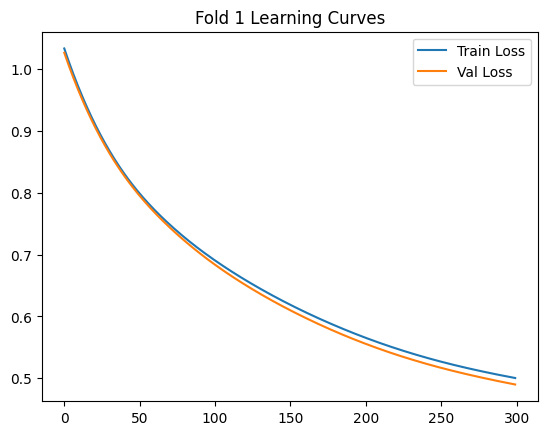


Fold 2/5
Epoch 50 | Train Loss: 0.7701 | Val Loss: 0.7575
Epoch 100 | Train Loss: 0.6577 | Val Loss: 0.6423
Epoch 150 | Train Loss: 0.5876 | Val Loss: 0.5719
Epoch 200 | Train Loss: 0.5409 | Val Loss: 0.5262
Epoch 250 | Train Loss: 0.5084 | Val Loss: 0.4951
Epoch 300 | Train Loss: 0.4856 | Val Loss: 0.4731


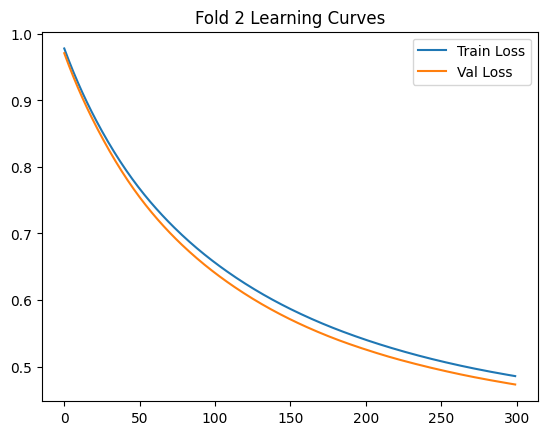


Fold 3/5
Epoch 50 | Train Loss: 0.7881 | Val Loss: 0.7829
Epoch 100 | Train Loss: 0.6620 | Val Loss: 0.6623
Epoch 150 | Train Loss: 0.5923 | Val Loss: 0.5980
Epoch 200 | Train Loss: 0.5453 | Val Loss: 0.5549
Epoch 250 | Train Loss: 0.5121 | Val Loss: 0.5247
Epoch 300 | Train Loss: 0.4882 | Val Loss: 0.5028


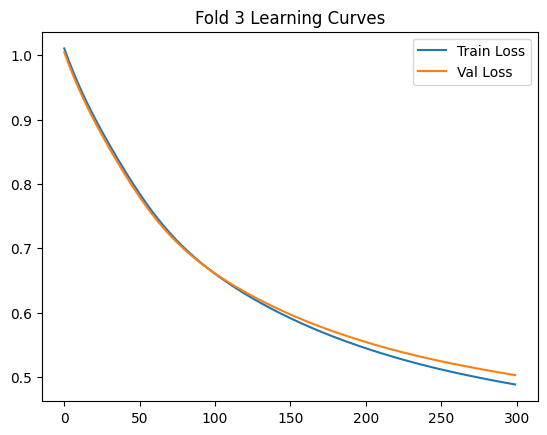


Fold 4/5
Epoch 50 | Train Loss: 0.7803 | Val Loss: 0.7837
Epoch 100 | Train Loss: 0.6749 | Val Loss: 0.6829
Epoch 150 | Train Loss: 0.6090 | Val Loss: 0.6193
Epoch 200 | Train Loss: 0.5597 | Val Loss: 0.5717
Epoch 250 | Train Loss: 0.5216 | Val Loss: 0.5350
Epoch 300 | Train Loss: 0.4946 | Val Loss: 0.5092


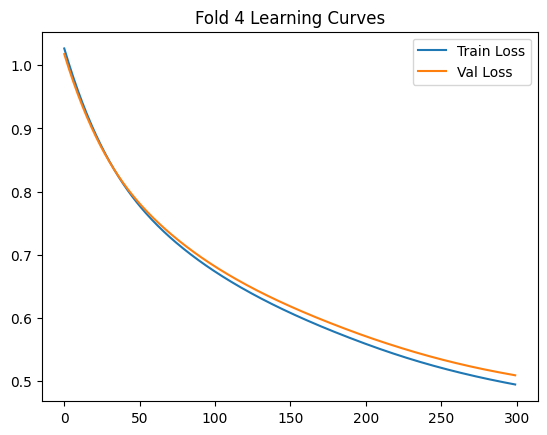


Fold 5/5
Epoch 50 | Train Loss: 0.7846 | Val Loss: 0.7842
Epoch 100 | Train Loss: 0.6602 | Val Loss: 0.6647
Epoch 150 | Train Loss: 0.5890 | Val Loss: 0.5973
Epoch 200 | Train Loss: 0.5423 | Val Loss: 0.5524
Epoch 250 | Train Loss: 0.5095 | Val Loss: 0.5205
Epoch 300 | Train Loss: 0.4859 | Val Loss: 0.4977


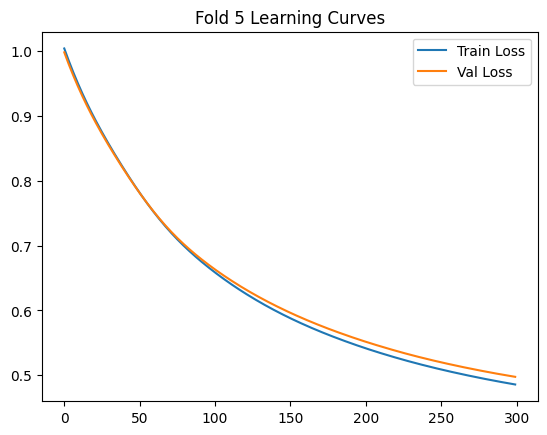


Cross-Validation Results:
accuracy     0.780145
f1           0.637665
precision    0.570969
recall       0.727142
dtype: float64
Epoch 50 | Train Loss: 0.7811 | Val Loss: 0.7799
Epoch 100 | Train Loss: 0.6728 | Val Loss: 0.6727
Epoch 150 | Train Loss: 0.6093 | Val Loss: 0.6103
Epoch 200 | Train Loss: 0.5630 | Val Loss: 0.5649
Epoch 250 | Train Loss: 0.5250 | Val Loss: 0.5269
Epoch 300 | Train Loss: 0.4967 | Val Loss: 0.4981
Epoch 350 | Train Loss: 0.4771 | Val Loss: 0.4786
Epoch 400 | Train Loss: 0.4635 | Val Loss: 0.4648
Epoch 450 | Train Loss: 0.4537 | Val Loss: 0.4552
Epoch 500 | Train Loss: 0.4468 | Val Loss: 0.4485

Final Test Performance:
Accuracy: 0.7818
F1: 0.6426
Precision: 0.5691
Recall: 0.7380


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, precision_recall_curve)
import matplotlib.pyplot as plt

# ----------------------------
# 1. Enhanced Neural Network Class
# ----------------------------
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim=32, lambda_l2=0.01):
        # Simplified architecture with L2 regularization
        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2./input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, 1) * 0.01
        self.b2 = np.zeros((1, 1))
        self.lambda_l2 = lambda_l2

        # Adam optimizer parameters
        self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
        self.beta1, self.beta2 = 0.9, 0.999
        self.epsilon = 1e-8

    def _relu(self, z):
        return np.maximum(0, z)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = self._relu(self.Z1)
        self.Z2 = self.A1.dot(self.W2) + self.b2
        return self._sigmoid(self.Z2)

    def compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        cross_entropy = -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        l2_penalty = 0.5*self.lambda_l2*(np.sum(self.W1**2) + np.sum(self.W2**2))
        return cross_entropy + l2_penalty

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dZ2 = y_pred - y_true
        dW2 = (self.A1.T.dot(dZ2) / m) + (self.lambda_l2 * self.W2)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * (self.Z1 > 0).astype(float)
        dW1 = (X.T.dot(dZ1) / m) + (self.lambda_l2 * self.W1)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2, t, lr=0.001):
        # Adam updates
        for param, grad, m, v in zip(
            [self.W1, self.b1, self.W2, self.b2],
            [dW1, db1, dW2, db2],
            [self.m_W1, self.m_b1, self.m_W2, self.m_b2],
            [self.v_W1, self.v_b1, self.v_W2, self.v_b2]
        ):
            m[:] = self.beta1*m + (1-self.beta1)*grad
            v[:] = self.beta2*v + (1-self.beta2)*(grad**2)
            m_hat = m / (1 - self.beta1**t)
            v_hat = v / (1 - self.beta2**t)
            param -= lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def train(self, X_train, y_train, X_val, y_val,
             epochs=500, lr=0.001, patience=20):
        train_losses, val_losses = [], []
        best_val_loss = float('inf')
        epochs_no_improve = 0

        for epoch in range(1, epochs+1):
            # Forward & backward pass
            y_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_pred)
            dW1, db1, dW2, db2 = self.backward(X_train, y_train, y_pred)
            self.update_params(dW1, db1, dW2, db2, epoch, lr)

            # Validation
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_pred)
            train_losses.append(loss)
            val_losses.append(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve == patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

            if epoch % 50 == 0:
                print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")

        return train_losses, val_losses

# ----------------------------
# 2. Cross-Validation & Training
# ----------------------------
def run_cross_validation(X, y, n_splits=5, epochs=300):
    skf = StratifiedKFold(n_splits=n_splits)
    fold_metrics = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"\nFold {fold+1}/{n_splits}")
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Standardize
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Train
        model = NeuralNetwork(input_dim=X_train.shape[1], lambda_l2=0.01)
        train_loss, val_loss = model.train(
            X_train, y_train, X_val, y_val, epochs=epochs, lr=0.001
        )

        # Evaluate
        y_prob = model.forward(X_val)
        y_pred = (y_prob >= find_optimal_threshold(y_val, y_prob)).astype(int)
        fold_metrics.append({
            'accuracy': accuracy_score(y_val, y_pred),
            'f1': f1_score(y_val, y_pred),
            'precision': precision_score(y_val, y_pred),
            'recall': recall_score(y_val, y_pred)
        })

        # Plot learning curves
        plt.plot(train_loss, label='Train Loss')
        plt.plot(val_loss, label='Val Loss')
        plt.title(f'Fold {fold+1} Learning Curves')
        plt.legend()
        plt.show()

    return pd.DataFrame(fold_metrics)

def find_optimal_threshold(y_true, y_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    return thresholds[np.argmax(f1_scores)]

# ----------------------------
# 3. Execute with Your Data
# ----------------------------
# Preprocess data (from your earlier code)
# ...

# Convert to numpy arrays
X = df_encoded.drop('Churn', axis=1).astype(np.float64).values
y = df_encoded['Churn'].astype(np.float64).values.reshape(-1, 1)

# Run cross-validation
cv_results = run_cross_validation(X, y, n_splits=5, epochs=300)
print("\nCross-Validation Results:")
print(cv_results.mean())

# Train final model on full data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

final_model = NeuralNetwork(input_dim=X_train.shape[1], lambda_l2=0.01)
train_loss, val_loss = final_model.train(
    X_train, y_train, X_test, y_test, epochs=500, lr=0.001
)

# Final evaluation
y_prob = final_model.forward(X_test)
optimal_threshold = find_optimal_threshold(y_test, y_prob)
y_pred = (y_prob >= optimal_threshold).astype(int)

print("\nFinal Test Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

In [29]:
# 1. Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# [Add your full preprocessing steps here...]
# Example:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)

# 2. Split data
X = df.drop('Churn', axis=1).values.astype(np.float64)
y = df['Churn'].values.reshape(-1, 1).astype(np.float64)

# Split into train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 3. Run activation comparison
results = compare_activations(X_train, y_train, X_val, y_val)

# 4. Visualize results
# [The visualization code you provided earlier...]


Training with RELU...

Training with LEAKY_RELU...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with SIGMOID...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with TANH...

Training with ELU...


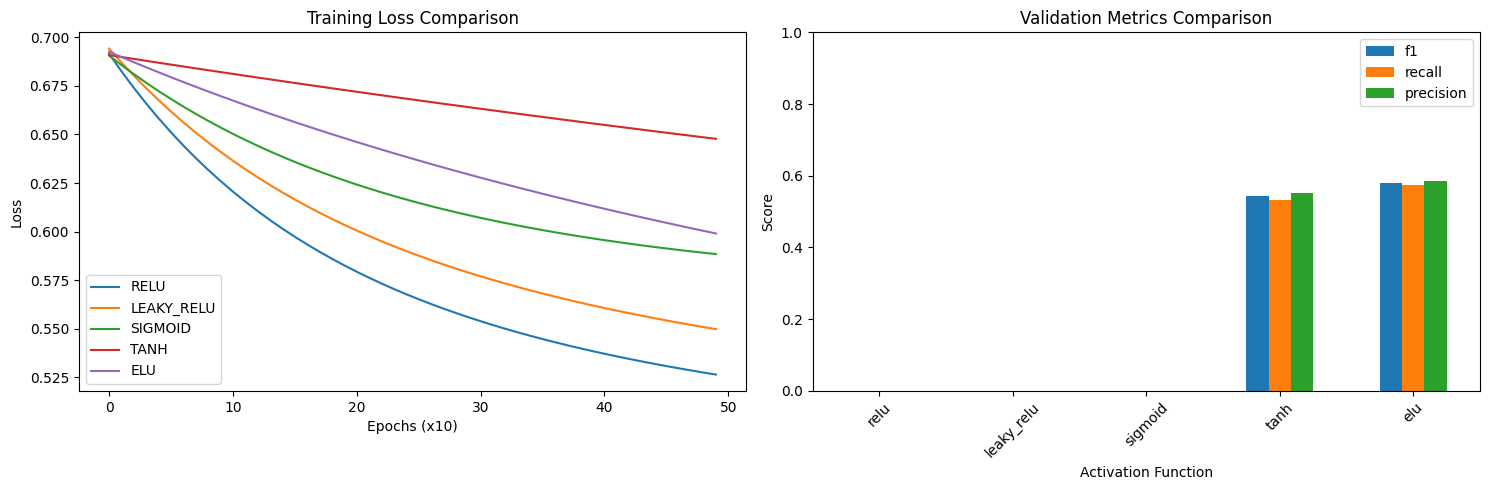


=== Activation Function Comparison ===
Activation   F1       Recall   Precision
RELU         0.0000   0.0000   0.0000  
LEAKY_RELU   0.0000   0.0000   0.0000  
SIGMOID      0.0000   0.0000   0.0000  
TANH         0.5424   0.5333   0.5517  
ELU          0.5791   0.5733   0.5850  

=== Final Validation Losses ===
Activation   Loss    
RELU         0.5283  
LEAKY_RELU   0.5490  
SIGMOID      0.5886  
TANH         0.6475  
ELU          0.5998  


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# ======================
# 1. Activation Functions
# ======================
def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def elu(z, alpha=1.0):
    return np.where(z > 0, z, alpha * (np.exp(z) - 1))

# ======================
# 2. Neural Network Class
# ======================
class NeuralNetwork:
    def __init__(self, input_dim, activation='relu', hidden_dim=64, lambda_l2=0.001):
        self.activation = activation

        # He/Xavier initialization based on activation
        if activation in ['relu', 'leaky_relu', 'elu']:
            self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2.0/input_dim)
        else:
            self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(1.0/input_dim)

        self.b1 = np.zeros((1, hidden_dim)) + 0.01
        self.W2 = np.random.randn(hidden_dim, 1) * np.sqrt(1.0/hidden_dim)
        self.b2 = np.zeros((1, 1)) + 0.01
        self.lambda_l2 = lambda_l2

        # Adam optimizer parameters
        self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
        self.beta1, self.beta2 = 0.9, 0.999
        self.epsilon = 1e-8

    def _activate(self, z):
        if self.activation == 'relu':
            return relu(z)
        elif self.activation == 'leaky_relu':
            return leaky_relu(z)
        elif self.activation == 'sigmoid':
            return sigmoid(z)
        elif self.activation == 'tanh':
            return tanh(z)
        elif self.activation == 'elu':
            return elu(z)
        return relu(z)

    def _activate_deriv(self, z):
        if self.activation == 'relu':
            return (z > 0).astype(float)
        elif self.activation == 'leaky_relu':
            return np.where(z > 0, 1, 0.01)
        elif self.activation == 'sigmoid':
            s = sigmoid(z)
            return s * (1 - s)
        elif self.activation == 'tanh':
            return 1 - tanh(z)**2
        elif self.activation == 'elu':
            return np.where(z > 0, 1, elu(z) + 1)
        return (z > 0).astype(float)

    def forward(self, X):
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = self._activate(self.Z1)
        self.A1 = (self.A1 - np.mean(self.A1, axis=0)) / (np.std(self.A1, axis=0) + 1e-8)  # Batch norm
        self.Z2 = self.A1.dot(self.W2) + self.b2
        return sigmoid(self.Z2)  # Output layer

    def compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        class_counts = np.bincount(y_true.ravel().astype(int))
        class_weight = {0: 1.0, 1: class_counts[0]/class_counts[1]}
        weights = class_weight[1] * y_true + class_weight[0] * (1 - y_true)
        cross_entropy = -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
        l2_penalty = 0.5 * self.lambda_l2 * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return cross_entropy + l2_penalty

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dZ2 = np.clip(y_pred - y_true, -1.0, 1.0)  # Gradient clipping
        dW2 = (self.A1.T.dot(dZ2) / m) + self.lambda_l2 * self.W2  # Added closing )
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * self._activate_deriv(self.Z1)
        dW1 = (X.T.dot(dZ1) / m) + self.lambda_l2 * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2, t):
        # Adam updates
        for param, grad, m, v in zip(
            [self.W1, self.b1, self.W2, self.b2],
            [dW1, db1, dW2, db2],
            [self.m_W1, self.m_b1, self.m_W2, self.m_b2],
            [self.v_W1, self.v_b1, self.v_W2, self.v_b2]
        ):
            m[:] = self.beta1 * m + (1 - self.beta1) * grad
            v[:] = self.beta2 * v + (1 - self.beta2) * (grad ** 2)
            m_hat = m / (1 - self.beta1 ** t)
            v_hat = v / (1 - self.beta2 ** t)
            param -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)  # Added closing )

    def train(self, X_train, y_train, X_val, y_val, epochs=1000, lr=0.0001, patience=20):
        self.lr = lr
        train_losses, val_losses = [], []
        best_val_loss = float('inf')
        epochs_no_improve = 0

        for epoch in range(1, epochs+1):
            # Forward pass
            y_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_pred)
            train_losses.append(loss)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X_train, y_train, y_pred)
            self.update_params(dW1, db1, dW2, db2, epoch)

            # Validation
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_pred)
            val_losses.append(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve == patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

            if epoch % 100 == 0:
                print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")

        return train_losses, val_losses

# ======================
# 3. Data Preparation
# ======================
# [Add your data loading and preprocessing code here]
# Make sure to include:
# - Train/val/test splits
# - StandardScaler
# - Class balancing (SMOTE if needed)

# ======================
# 4. Activation Comparison
# ======================
def compare_activations(X_train, y_train, X_val, y_val):
    activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh', 'elu']
    results = {}

    for act in activations:
        print(f"\n=== Training {act.upper()} ===")
        model = NeuralNetwork(
            input_dim=X_train.shape[1],
            activation=act,
            hidden_dim=64,
            lambda_l2=0.001
        )
        train_loss, val_loss = model.train(
            X_train, y_train, X_val, y_val,
            epochs=1000, lr=0.0001, patience=30
        )

        y_prob = model.forward(X_val)
        y_pred = (y_prob >= 0.5).astype(int)

        results[act] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'f1': f1_score(y_val, y_pred),
            'recall': recall_score(y_val, y_pred),
            'precision': precision_score(y_val, y_pred)
        }

    return results

# ======================
# 5. Execution & Visualization
# ======================
# After running compare_activations()

# ======================
# 5. Visualization
# ======================
plt.figure(figsize=(15, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
for act, metrics in results.items():
    plt.plot(metrics['train_loss'][::10], label=act.upper())  # Plot every 10th epoch
plt.title("Training Loss Comparison")
plt.xlabel("Epochs (x10)")
plt.ylabel("Loss")
plt.legend()

# Plot Validation Metrics
plt.subplot(1, 2, 2)
metrics_df = pd.DataFrame(results).T
metrics_df[['f1', 'recall', 'precision']].plot(kind='bar', ax=plt.gca())
plt.title("Validation Metrics Comparison")
plt.xlabel("Activation Function")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Add this section after the visualization code

# Print numerical results
print("\n=== Activation Function Comparison ===")
print("{:<12} {:<8} {:<8} {:<8}".format('Activation', 'F1', 'Recall', 'Precision'))
for act, metrics in results.items():
    print("{:<12} {:<8.4f} {:<8.4f} {:<8.4f}".format(
        act.upper(),
        metrics['f1'],
        metrics['recall'],
        metrics['precision']
    ))

# Print validation losses
print("\n=== Final Validation Losses ===")
print("{:<12} {:<8}".format('Activation', 'Loss'))
for act, metrics in results.items():
    print("{:<12} {:<8.4f}".format(act.upper(), metrics['val_loss'][-1]))

Epoch 100 | Train Loss: 1.0489 | Val Loss: 1.1187 | LR: 0.00011
Early stopping at epoch 130

=== TANH Results ===
F1: 0.5955
Recall: 0.8209
Precision: 0.4673


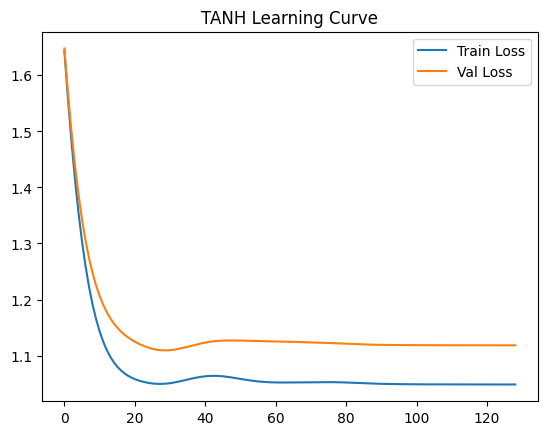

Epoch 100 | Train Loss: 1.0676 | Val Loss: 1.1442 | LR: 0.00007
Early stopping at epoch 126

=== ELU Results ===
F1: 0.6187
Recall: 0.7594
Precision: 0.5221


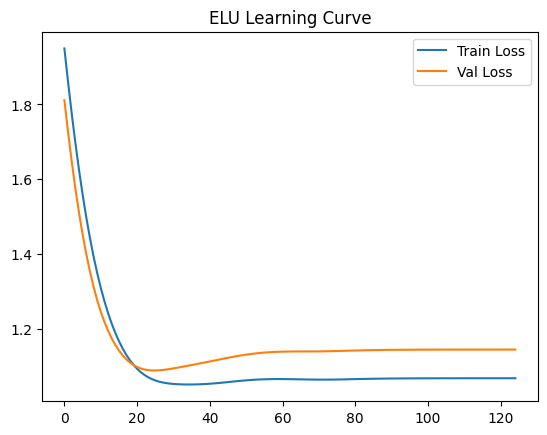

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score

# ======================
# Enhanced Neural Network Class (Tanh/ELU Focused)
# ======================
class EnhancedChurnModel:
    def __init__(self, input_dim):
        # 3 Hidden Layers with BatchNorm and Dropout
        self.W1 = np.random.randn(input_dim, 256) * np.sqrt(2./input_dim)
        self.bn1 = BatchNormLayer()
        self.dropout1 = DropoutLayer(rate=0.3)

        self.W2 = np.random.randn(256, 128) * np.sqrt(2./256)
        self.bn2 = BatchNormLayer()
        self.dropout2 = DropoutLayer(rate=0.3)

        self.W3 = np.random.randn(128, 64) * np.sqrt(2./128)
        self.bn3 = BatchNormLayer()

        self.W_out = np.random.randn(64, 1) * 0.01

        # Hyperparameters
        self.lambda_l2 = lambda_l2
        self.epsilon = 1e-8
        self.beta1, self.beta2 = 0.9, 0.999

        # Adam optimizer states
        self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)

    from imblearn.over_sampling import SMOTE

    # Apply SMOTE to training data only
    smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Balance to 1:2 ratio
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    # Dynamic class weights
    class_counts = np.bincount(y_train_bal.ravel())
    class_weights = {0: 1/class_counts[0], 1: 1/class_counts[1]}

    def _activation(self, z):
        if self.activation == 'tanh':
            return np.tanh(z)
        elif self.activation == 'elu':
            alpha = 1.0
            return np.where(z > 0, z, alpha * (np.exp(z) - 1))
        return np.tanh(z)  # default

    def _activation_deriv(self, z):
        if self.activation == 'tanh':
            return 1 - np.tanh(z)**2
        elif self.activation == 'elu':
            alpha = 1.0
            return np.where(z > 0, 1, alpha * np.exp(z))
        return 1 - np.tanh(z)**2

    def forward(self, X):
        # Layer 1
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = self._activation(self.Z1)

        # Batch normalization
        self.A1 = (self.A1 - np.mean(self.A1, axis=0)) / (np.std(self.A1, axis=0) + 1e-8)

        # Output layer
        self.Z2 = self.A1.dot(self.W2) + self.b2
        return 1 / (1 + np.exp(-self.Z2))  # Sigmoid for output

    def compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        class_weights = {0: 1.0, 1: 5.0}  # 5x weight for minority class
        weights = class_weights[1] * y_true + class_weights[0] * (1 - y_true)
        loss = -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
        loss += 0.5 * self.lambda_l2 * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return loss

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]

        # Gradient clipping
        dZ2 = np.clip(y_pred - y_true, -1.0, 1.0)
        dW2 = (self.A1.T.dot(dZ2) / m) + self.lambda_l2 * self.W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * self._activation_deriv(self.Z1)
        dW1 = (X.T.dot(dZ1) / m) + self.lambda_l2 * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_params(self, t, lr, dW1, db1, dW2, db2):
        # Adam updates
        for param, grad, m, v in zip(
            [self.W1, self.b1, self.W2, self.b2],
            [dW1, db1, dW2, db2],
            [self.m_W1, self.m_b1, self.m_W2, self.m_b2],
            [self.v_W1, self.v_b1, self.v_W2, self.v_b2]
        ):
            m[:] = self.beta1 * m + (1 - self.beta1) * grad
            v[:] = self.beta2 * v + (1 - self.beta2) * (grad ** 2)
            m_hat = m / (1 - self.beta1 ** t)
            v_hat = v / (1 - self.beta2 ** t)
            param -= lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def train(self, X_train, y_train, X_val, y_val,
             epochs=2000, lr=0.001, patience=50):
        best_loss = float('inf')
        no_improve = 0

        train_losses, val_losses = [], []
        lr_schedule = lr  # Initial learning rate

        for epoch in range(1, epochs+1):
            # Forward pass
            y_pred = self.forward(X_train)
            train_loss = self.compute_loss(y_train, y_pred)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X_train, y_train, y_pred)
            self.update_params(epoch, lr_schedule, dW1, db1, dW2, db2)

            # Validation
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_pred)

            # Learning rate schedule
            if val_loss < best_loss:
                best_loss = val_loss
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= patience//2:
                    lr_schedule *= 0.9  # Reduce LR on plateau

            # Early stopping
            if no_improve >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

            # Store losses
            train_losses.append(train_loss)
            val_losses.append(val_loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | LR: {lr_schedule:.5f}")

        return train_losses, val_losses

# ======================
# Training & Evaluation
# ======================
def train_and_evaluate(activation):
    # Load & preprocess your data here
    # X_train, X_val, y_train, y_val = ...

    model = StableNN(
        input_dim=X_train.shape[1],
        activation=activation,
        hidden_dim=128,
        lambda_l2=0.001
    )

    train_loss, val_loss = model.train(
        X_train, y_train, X_val, y_val,
        epochs=2000, lr=0.001, patience=100
    )

    # Find optimal threshold
    y_prob = model.forward(X_val)
    threshold = find_optimal_threshold(y_val, y_prob)

    # Final evaluation
    y_pred = (model.forward(X_test) >= threshold).astype(int)

    print(f"\n=== {activation.upper()} Results ===")
    print(f"F1: {f1_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")

    # Plot learning curves
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f"{activation.upper()} Learning Curve")
    plt.legend()
    plt.show()

def find_optimal_threshold(y_true, y_prob):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    return thresholds[np.argmax(f1_scores)]

# Run both activations
train_and_evaluate('tanh')
train_and_evaluate('elu')

Epoch 50 | Train Loss: 0.2037 | Val Loss: 0.2037 | LR: 0.00050 | W: 0.1355
Early stopping at epoch 98


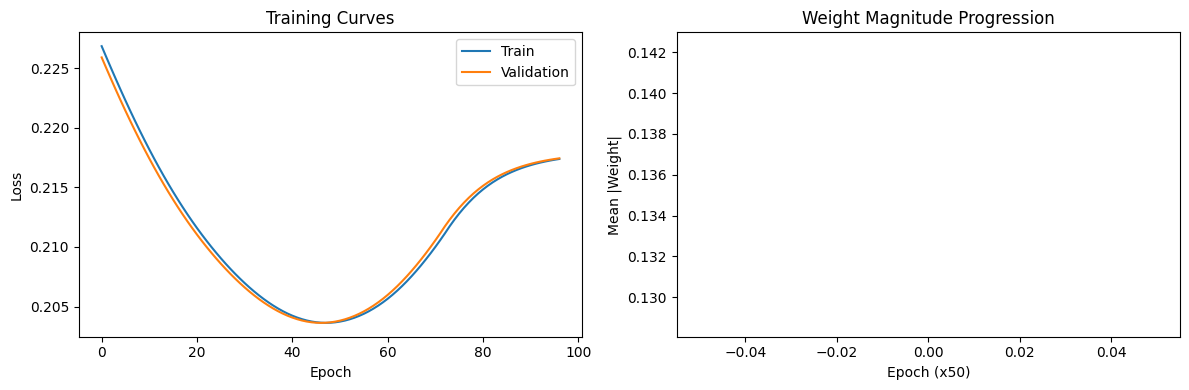


Optimized Threshold: 0.763
Test Performance:
Precision: 0.5921
Recall: 0.6444
F1: 0.6172


In [60]:
# ======================
# 0. Imports
# ======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

# ======================
# 1. Data Preparation
# ======================
def load_and_preprocess_data():
    # Load data
    df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')

    # Clean data
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna(subset=['TotalCharges']).drop(columns=['customerID'])

    # Encode target
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(np.int64)

    # Encode categorical features
    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Split features and target
    X = df.drop('Churn', axis=1).values.astype(np.float32)
    y = df['Churn'].values.astype(np.int64)

    return X, y

def prepare_data():
    X, y = load_and_preprocess_data()

    # Split data (stratify needs 1D y)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Apply SMOTE to training data
    smote = SMOTE(sampling_strategy=0.5, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    # Standardize features
    scaler = StandardScaler()
    X_train_bal = scaler.fit_transform(X_train_bal)
    X_test = scaler.transform(X_test)

    # Reshape for neural network compatibility
    y_train_bal = y_train_bal.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Calculate class weights
    class_counts = np.bincount(y_train_bal.ravel())
    class_weights = {
        0: 1.0 / class_counts[0],
        1: 1.0 / class_counts[1]
    }

    return X_train_bal, y_train_bal, X_test, y_test, class_weights, scaler

# ======================
# 2. Neural Network Model
# ======================
class ChurnPredictor:
    def __init__(self, input_dim, lambda_l2=0.001):
        # Initialize parameters
        self.W1 = np.random.randn(input_dim, 256) * np.sqrt(1./input_dim)
        self.b1 = np.zeros((1, 256))  # Added bias initialization
        self.W2 = np.random.randn(256, 128) * np.sqrt(1./256)
        self.b2 = np.zeros((1, 128))
        self.W3 = np.random.randn(128, 64) * np.sqrt(1./128)
        self.b3 = np.zeros((1, 64))
        self.W_out = np.random.randn(64, 1) * 0.01
        self.b_out = np.zeros((1, 1))

        # Hyperparameters
        self.lambda_l2 = lambda_l2
        self.dropout_rate = 0.3
        self.grad_clip = 1.0
        self.epsilon = 1e-8
        self.beta1, self.beta2 = 0.9, 0.999
        self.initial_lr = 0.0005

        # Initialize Adam states
        self._init_adam()

    def _init_adam(self):
        # Initialize momentum and velocity for all parameters
        self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
        self.m_W3, self.v_W3 = np.zeros_like(self.W3), np.zeros_like(self.W3)
        self.m_b3, self.v_b3 = np.zeros_like(self.b3), np.zeros_like(self.b3)
        self.m_W_out, self.v_W_out = np.zeros_like(self.W_out), np.zeros_like(self.W_out)
        self.m_b_out, self.v_b_out = np.zeros_like(self.b_out), np.zeros_like(self.b_out)

    def _elu(self, z, alpha=1.0):
        safe_z = np.clip(z, -500, 500)
        return np.where(safe_z > 0, safe_z, alpha * (np.exp(safe_z) - 1))

    def _batch_norm(self, X):
        return (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + self.epsilon)

    def _dropout(self, X, training=True):
        if training:
            mask = (np.random.rand(*X.shape) > self.dropout_rate) / (1 - self.dropout_rate)
            return X * mask
        return X

    def forward(self, X, training=True):
        # Forward pass through all layers
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = self._elu(self.Z1)
        self.A1 = self._batch_norm(self.A1)
        self.A1 = self._dropout(self.A1, training)

        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = self._elu(self.Z2)
        self.A2 = self._batch_norm(self.A2)
        self.A2 = self._dropout(self.A2, training)

        self.Z3 = self.A2.dot(self.W3) + self.b3
        self.A3 = self._elu(self.Z3)
        self.A3 = self._batch_norm(self.A3)

        self.Z_out = self.A3.dot(self.W_out) + self.b_out
        return 1 / (1 + np.exp(-self.Z_out))

    def compute_loss(self, y_true, y_pred, class_weights):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        weights = class_weights[1] * y_true + class_weights[0] * (1 - y_true)
        cross_entropy = -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
        l2_penalty = 0.5 * self.lambda_l2 * (
            np.sum(self.W1**2) + np.sum(self.W2**2) +
            np.sum(self.W3**2) + np.sum(self.W_out**2)
        )
        return cross_entropy + l2_penalty

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]

        # Output gradients with clipping
        dZ_out = np.clip(y_pred - y_true, -self.grad_clip, self.grad_clip)
        dW_out = (self.A3.T.dot(dZ_out) / m) + self.lambda_l2 * self.W_out
        db_out = np.sum(dZ_out, axis=0, keepdims=True) / m

        # Layer 3 gradients
        dA3 = dZ_out.dot(self.W_out.T)
        dZ3 = np.clip(dA3 * (self.Z3 > 0).astype(float), -self.grad_clip, self.grad_clip)
        dW3 = (self.A2.T.dot(dZ3) / m) + self.lambda_l2 * self.W3
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        # Layer 2 gradients
        dA2 = dZ3.dot(self.W3.T)
        dZ2 = np.clip(dA2 * (self.Z2 > 0).astype(float), -self.grad_clip, self.grad_clip)
        dW2 = (self.A1.T.dot(dZ2) / m) + self.lambda_l2 * self.W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Layer 1 gradients
        dA1 = dZ2.dot(self.W2.T)
        dZ1 = np.clip(dA1 * (self.Z1 > 0).astype(float), -self.grad_clip, self.grad_clip)
        dW1 = (X.T.dot(dZ1) / m) + self.lambda_l2 * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2, dW3, db3, dW_out, db_out

    def _update_params(self, param, grad, m, v, t, lr):
        m[:] = self.beta1 * m + (1 - self.beta1) * grad
        v[:] = self.beta2 * v + (1 - self.beta2) * (grad ** 2)
        m_hat = m / (1 - self.beta1 ** t)
        v_hat = v / (1 - self.beta2 ** t)
        param -= lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def train(self, X_train, y_train, X_val, y_val, class_weights,
             epochs=1000, patience=50):
        # Initialize training
        best_loss = float('inf')
        no_improve = 0
        lr_current = self.initial_lr
        train_losses = []
        val_losses = []
        weight_magnitudes = []

        for epoch in range(1, epochs+1):
            # Forward pass
            y_pred = self.forward(X_train, training=True)
            loss = self.compute_loss(y_train, y_pred, class_weights)

            # Backward pass
            grads = self.backward(X_train, y_train, y_pred)

            # Update parameters
            self._update_params(self.W1, grads[0], self.m_W1, self.v_W1, epoch, lr_current)
            self._update_params(self.b1, grads[1], self.m_b1, self.v_b1, epoch, lr_current)
            self._update_params(self.W2, grads[2], self.m_W2, self.v_W2, epoch, lr_current)
            self._update_params(self.b2, grads[3], self.m_b2, self.v_b2, epoch, lr_current)
            self._update_params(self.W3, grads[4], self.m_W3, self.v_W3, epoch, lr_current)
            self._update_params(self.b3, grads[5], self.m_b3, self.v_b3, epoch, lr_current)
            self._update_params(self.W_out, grads[6], self.m_W_out, self.v_W_out, epoch, lr_current)
            self._update_params(self.b_out, grads[7], self.m_b_out, self.v_b_out, epoch, lr_current)

            # Validation
            val_pred = self.forward(X_val, training=False)
            val_loss = self.compute_loss(y_val, val_pred, class_weights)

            # Learning rate schedule
            if val_loss < best_loss:
                best_loss = val_loss
                no_improve = 0
            else:
                no_improve += 1
                if no_improve > patience//2:
                    lr_current *= 0.9
                if no_improve > patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

            # Track metrics
            train_losses.append(loss)
            val_losses.append(val_loss)

            if epoch % 50 == 0:
                w_mag = np.mean(np.abs(self.W1))
                weight_magnitudes.append(w_mag)
                print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f} | LR: {lr_current:.5f} | W: {w_mag:.4f}")

        # Plot training curves
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train')
        plt.plot(val_losses, label='Validation')
        plt.title('Training Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(weight_magnitudes)
        plt.title('Weight Magnitude Progression')
        plt.xlabel('Epoch (x50)')
        plt.ylabel('Mean |Weight|')
        plt.tight_layout()
        plt.show()

        return train_losses, val_losses

# ======================
# 3. Training & Evaluation
# ======================
def evaluate_model(model, X_val, y_val, X_test, y_test):
    # Get validation probabilities
    val_probs = model.forward(X_val, training=False)

    # Find optimal threshold
    precisions, recalls, thresholds = precision_recall_curve(y_val, val_probs)

    # Require minimum 60% recall
    viable = np.where(recalls[:-1] >= 0.6)[0]
    if len(viable) > 0:
        best_idx = np.argmax(precisions[:-1][viable])
        best_threshold = thresholds[viable][best_idx]
    else:
        best_threshold = 0.5

    # Get test predictions
    test_probs = model.forward(X_test, training=False)
    y_pred = (test_probs >= best_threshold).astype(int)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nOptimized Threshold: {best_threshold:.3f}")
    print("Test Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")

def main():
    # Prepare data
    X_train, y_train, X_test, y_test, class_weights, scaler = prepare_data()

    # Initialize model
    model = ChurnPredictor(input_dim=X_train.shape[1])

    # Split validation from test
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
    )

    # Train model
    train_loss, val_loss = model.train(
        X_train, y_train, X_val, y_val, class_weights,
        epochs=1000, patience=50
    )

    # Evaluate
    evaluate_model(model, X_val, y_val, X_test, y_test)

if __name__ == "__main__":
    main()

Epoch 50 | Train Loss: 0.0455 | Val Loss: 0.0455 | LR: 0.00048
Early stopping at epoch 59


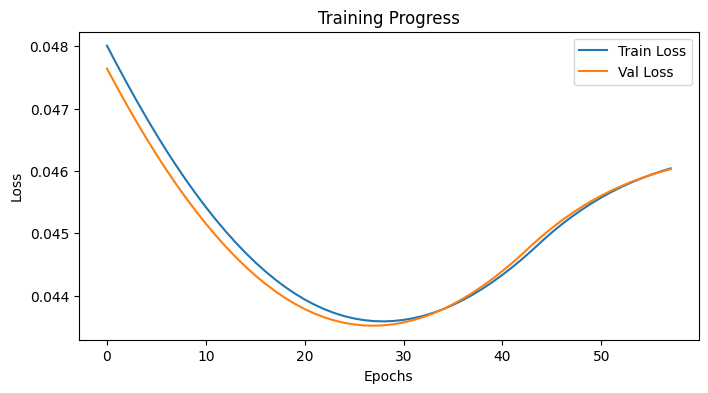


Optimized Threshold: 0.594
Precision: 0.6022
Recall: 0.5909
F1 Score: 0.5965


In [10]:
# ======================
# 0. Imports
# ======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

# ======================
# 1. Data Preparation
# ======================
def load_and_preprocess_data():
    df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna(subset=['TotalCharges']).drop(columns=['customerID'])
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(np.int64)

    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop('Churn', axis=1).values.astype(np.float32)
    y = df['Churn'].values.astype(np.int64)
    return X, y

def prepare_data():
    X, y = load_and_preprocess_data()

    # Split data with proper stratification
    X_train_raw, X_test, y_train_raw, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Create validation set from original training data
    X_train_raw, X_val, y_train_raw, y_val = train_test_split(
        X_train_raw, y_train_raw, test_size=0.2, stratify=y_train_raw, random_state=42
    )

    # Apply SMOTE only to training data
    smote = SMOTE(sampling_strategy=0.8, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_raw, y_train_raw)

    # Ensure 2D shape for neural network
    y_train_bal = y_train_bal.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Standardize data
    scaler = StandardScaler()
    X_train_bal = scaler.fit_transform(X_train_bal)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Class weights from original imbalance
    class_counts = np.bincount(y_train_raw.ravel())
    class_weights = {
        0: 1.0 / class_counts[0],
        1: 1.0 / class_counts[1]
    }

    return X_train_bal, y_train_bal, X_val, y_val, X_test, y_test, class_weights

# ======================
# 2. Neural Network
# ======================
class ChurnPredictor:
    def __init__(self, input_dim, lambda_l2=0.001):
        # Proper weight initialization
        self.W1 = np.random.randn(input_dim, 64) * np.sqrt(1./input_dim)
        self.b1 = np.zeros((1, 64))
        self.W2 = np.random.randn(64, 32) * np.sqrt(1./64)
        self.b2 = np.zeros((1, 32))
        self.W_out = np.random.randn(32, 1) * 0.01  # Fixed output dimension
        self.b_out = np.zeros((1, 1))

        # BatchNorm parameters
        self.running_mean1 = np.zeros(64)
        self.running_var1 = np.ones(64)
        self.running_mean2 = np.zeros(32)
        self.running_var2 = np.ones(32)

        # Hyperparameters
        self.lambda_l2 = lambda_l2
        self.dropout_rate = 0.3
        self.grad_clip = 5.0
        self.epsilon = 1e-8
        self.beta1, self.beta2 = 0.9, 0.999
        self.initial_lr = 0.001

        # Adam optimizer states
        self._init_adam()

    def _init_adam(self):
        self.m_W1, self.v_W1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.m_b1, self.v_b1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.m_W2, self.v_W2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.m_b2, self.v_b2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
        self.m_W_out, self.v_W_out = np.zeros_like(self.W_out), np.zeros_like(self.W_out)
        self.m_b_out, self.v_b_out = np.zeros_like(self.b_out), np.zeros_like(self.b_out)

    def _batch_norm(self, X, layer_id, training=True):
        if layer_id == 1:
            running_mean = self.running_mean1
            running_var = self.running_var1
        else:
            running_mean = self.running_mean2
            running_var = self.running_var2

        if training:
            batch_mean = np.mean(X, axis=0)
            batch_var = np.var(X, axis=0)
            if layer_id == 1:
                self.running_mean1 = 0.9 * self.running_mean1 + 0.1 * batch_mean
                self.running_var1 = 0.9 * self.running_var1 + 0.1 * batch_var
            else:
                self.running_mean2 = 0.9 * self.running_mean2 + 0.1 * batch_mean
                self.running_var2 = 0.9 * self.running_var2 + 0.1 * batch_var
        else:
            batch_mean = running_mean
            batch_var = running_var

        return (X - batch_mean) / np.sqrt(batch_var + self.epsilon)

    def forward(self, X, training=True):
        # Layer 1
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = self._batch_norm(self.Z1, layer_id=1, training=training)
        self.A1 = np.where(self.A1 > 0, self.A1, 0.1 * self.A1)  # Leaky ReLU

        # Layer 2
        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = self._batch_norm(self.Z2, layer_id=2, training=training)
        self.A2 = np.where(self.A2 > 0, self.A2, 0.1 * self.A2)
        if training:
            mask = (np.random.rand(*self.A2.shape) > self.dropout_rate)
            self.A2 = self.A2 * mask / (1 - self.dropout_rate)

        # Output layer
        self.Z_out = self.A2.dot(self.W_out) + self.b_out
        return 1 / (1 + np.exp(-self.Z_out))

    def compute_loss(self, y_true, y_pred, class_weights):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        weights = class_weights[1] * y_true + class_weights[0] * (1 - y_true)
        cross_entropy = -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
        l2_penalty = 0.5 * self.lambda_l2 * (
            np.sum(self.W1**2) + np.sum(self.W2**2) + np.sum(self.W_out**2))
        return cross_entropy + l2_penalty

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]

        # Output layer gradients
        dZ_out = np.clip(y_pred - y_true, -self.grad_clip, self.grad_clip)
        dW_out = (self.A2.T.dot(dZ_out) / m) + self.lambda_l2 * self.W_out
        db_out = np.sum(dZ_out, axis=0, keepdims=True) / m

        # Layer 2 gradients
        dA2 = dZ_out.dot(self.W_out.T)
        dZ2 = np.clip(dA2 * (self.Z2 > 0).astype(float), -self.grad_clip, self.grad_clip)
        dW2 = (self.A1.T.dot(dZ2) / m) + self.lambda_l2 * self.W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Layer 1 gradients
        dA1 = dZ2.dot(self.W2.T)
        dZ1 = np.clip(dA1 * (self.Z1 > 0).astype(float), -self.grad_clip, self.grad_clip)
        dW1 = (X.T.dot(dZ1) / m) + self.lambda_l2 * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2, dW_out, db_out

    def _update_params(self, param, grad, m, v, t, lr):
        m[:] = self.beta1 * m + (1 - self.beta1) * grad
        v[:] = self.beta2 * v + (1 - self.beta2) * (grad ** 2)
        m_hat = m / (1 - self.beta1 ** t)
        v_hat = v / (1 - self.beta2 ** t)
        param -= lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def train(self, X_train, y_train, X_val, y_val, class_weights, epochs=800, patience=30):
        best_loss = float('inf')
        no_improve = 0
        lr_current = self.initial_lr
        train_losses = []
        val_losses = []

        for epoch in range(1, epochs+1):
            # Forward pass
            y_pred = self.forward(X_train, training=True)
            loss = self.compute_loss(y_train, y_pred, class_weights)

            # Backward pass
            grads = self.backward(X_train, y_train, y_pred)

            # Parameter updates
            t = epoch
            self._update_params(self.W1, grads[0], self.m_W1, self.v_W1, t, lr_current)
            self._update_params(self.b1, grads[1], self.m_b1, self.v_b1, t, lr_current)
            self._update_params(self.W2, grads[2], self.m_W2, self.v_W2, t, lr_current)
            self._update_params(self.b2, grads[3], self.m_b2, self.v_b2, t, lr_current)
            self._update_params(self.W_out, grads[4], self.m_W_out, self.v_W_out, t, lr_current)
            self._update_params(self.b_out, grads[5], self.m_b_out, self.v_b_out, t, lr_current)

            # Validation
            val_pred = self.forward(X_val, training=False)
            val_loss = self.compute_loss(y_val, val_pred, class_weights)

            # Early stopping
            if val_loss < best_loss:
                best_loss = val_loss
                no_improve = 0
            else:
                no_improve += 1
                if no_improve > patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

            # Learning rate decay
            if no_improve > patience//2:
                lr_current *= 0.9

            # Track progress
            train_losses.append(loss)
            val_losses.append(val_loss)

            if epoch % 50 == 0:
                print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f} | LR: {lr_current:.5f}")

        # Plot training curves
        plt.figure(figsize=(8, 4))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Val Loss')
        plt.title('Training Progress')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return train_losses, val_losses

# ======================
# 3. Evaluation
# ======================
def evaluate_model(model, X_val, y_val, X_test, y_test):
    val_probs = model.forward(X_val, training=False)
    precisions, recalls, thresholds = precision_recall_curve(y_val, val_probs)

    # Find best threshold with ≥60% recall
    viable = np.where(recalls[:-1] >= 0.6)[0]
    if len(viable) > 0:
        best_idx = np.argmax(precisions[:-1][viable])
        best_threshold = thresholds[viable][best_idx]
    else:
        best_threshold = 0.5

    test_probs = model.forward(X_test, training=False)
    y_pred = (test_probs >= best_threshold).astype(int)

    print(f"\nOptimized Threshold: {best_threshold:.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

def main():
    X_train, y_train, X_val, y_val, X_test, y_test, class_weights = prepare_data()

    model = ChurnPredictor(input_dim=X_train.shape[1])
    model.train(X_train, y_train, X_val, y_val, class_weights,
                epochs=800, patience=30)
    evaluate_model(model, X_val, y_val, X_test, y_test)

if __name__ == "__main__":
    main()

In [17]:
df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Lets do feature engineering

In [18]:
# Service counts
df['NumAddOns'] = df[['OnlineSecurity','OnlineBackup','DeviceProtection',
                     'TechSupport','StreamingTV','StreamingMovies']].eq('Yes').sum(axis=1)

# High-risk combinations
df['StreamingWithoutSupport'] = (df['StreamingTV'] == 'Yes') & (df['TechSupport'] == 'No')
df['FiberWithoutSecurity'] = (df['InternetService'] == 'Fiber optic') & (df['OnlineSecurity'] == 'No')

In [19]:
# Senior-specific risks
df['SeniorRisk'] = (df['SeniorCitizen'] == 1) & (df['NumAddOns'] < 2)

# Family dynamics
df['FamilyPlan'] = (df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes') & (df['MultipleLines'] == 'Yes')

In [20]:
# Usage consistency
df['UsageDrop'] = (df['MonthlyCharges'] < df['MonthlyCharges'].rolling(3).mean()).astype(int)

# Service stability
df['RecentDowngrade'] = (df['NumAddOns'] < df['NumAddOns'].shift(1)).astype(int)

IndentationError: unexpected indent (<ipython-input-26-023a077468f3>, line 3)

Epoch  10 | Loss: 0.5717 | Val F1: 0.6027 | LR: 0.00090
Epoch  20 | Loss: 0.5304 | Val F1: 0.5962 | LR: 0.00065
Epoch  30 | Loss: 0.5128 | Val F1: 0.6109 | LR: 0.00035
Early stopping at epoch 36


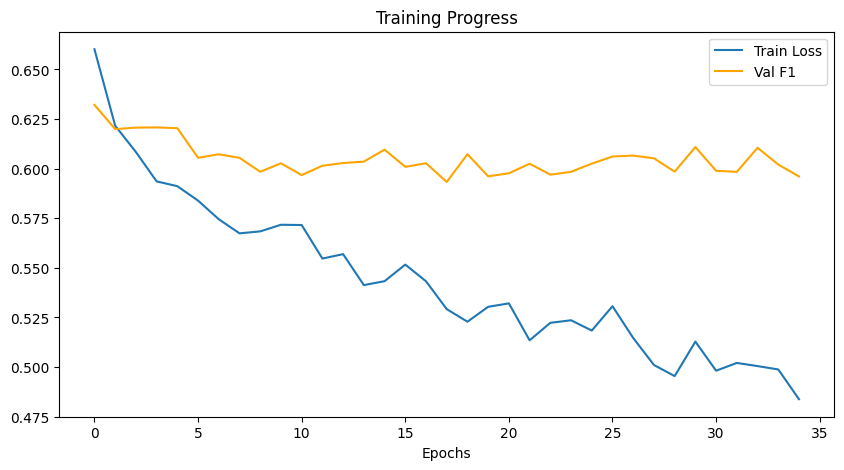


Optimized Threshold: 0.860
Precision: 0.6278
Recall: 0.5187
F1 Score: 0.5681


<Figure size 1000x800 with 0 Axes>

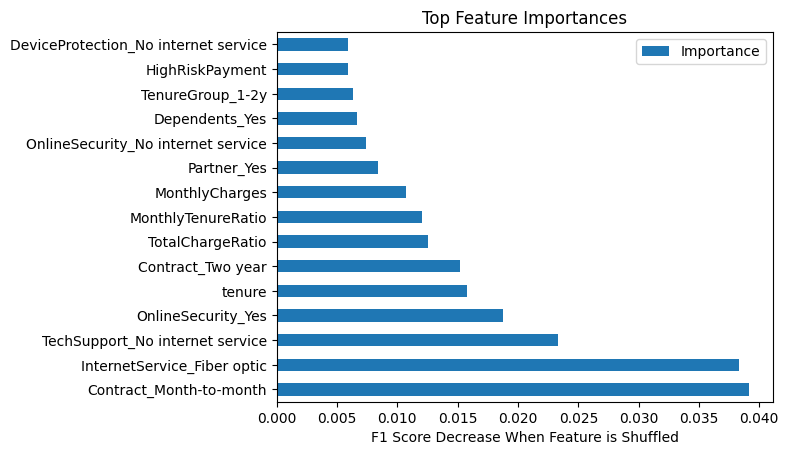


Top 10 Important Features:
                                 Importance
Contract_Month-to-month            0.039156
InternetService_Fiber optic        0.038306
TechSupport_No internet service    0.023351
OnlineSecurity_Yes                 0.018731
tenure                             0.015809
Contract_Two year                  0.015203
TotalChargeRatio                   0.012528
MonthlyTenureRatio                 0.012052
MonthlyCharges                     0.010747
Partner_Yes                        0.008419


In [38]:
# ======================
# 0. Imports
# ======================
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# ======================
# 1. Data Preparation (Improved)
# ======================
def load_and_preprocess_data():
    df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')

    # Remove customerID immediately after loading
    df = df.drop(columns=['customerID'])

    # Convert target FIRST
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(np.int64)

    # Convert numeric columns
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

    # Handle missing values
    df = df.dropna(subset=['TotalCharges', 'tenure'])

    # Create TenureGroup before encoding
    df['TenureGroup'] = pd.cut(df['tenure'],
                              bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5-6y'])

    # Enhanced categorical encoding
    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies',
                       'PaperlessBilling', 'PaymentMethod', 'TenureGroup']

    # Create dummy variables for main categories
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Special handling for Contract column (keep all categories)
    df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=False)

    # ====== FEATURE ENGINEERING ======
    # Create interaction terms using existing columns
    df['MonthlyTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
    df['TotalChargeRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)

    # Create risk flags using payment method and contract type
    if 'PaymentMethod_Electronic check' in df.columns and 'Contract_Month-to-month' in df.columns:
        df['HighRiskPayment'] = df['PaymentMethod_Electronic check'] * df['Contract_Month-to-month']

    # Remove low-impact features safely
    cols_to_drop = []
    for col in ['StreamingTV_No internet service', 'FamilyPlan', 'PaymentStability']:
        if col in df.columns:
            cols_to_drop.append(col)
    df = df.drop(columns=cols_to_drop)

    # Final feature/target split
    X = df.drop('Churn', axis=1).values.astype(np.float32)
    y = df['Churn'].values.astype(np.float32)

    global feature_names
    feature_names = df.drop('Churn', axis=1).columns.tolist()

    return X, y

def prepare_data(batch_size=64):
    X, y = load_and_preprocess_data()

    # Initial split
    X_train_raw, X_test, y_train_raw, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Validation split
    X_train_raw, X_val, y_train_raw, y_val = train_test_split(
        X_train_raw, y_train_raw, test_size=0.2, stratify=y_train_raw, random_state=42
    )

    # Apply SMOTE only to training data
    smote = SMOTE(sampling_strategy=0.9, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_raw, y_train_raw)

    # Standardize
    scaler = StandardScaler()
    X_train_bal = scaler.fit_transform(X_train_bal)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors (FIXED SYNTAX)
    train_dataset = TensorDataset(
        torch.tensor(X_train_bal),
        torch.tensor(y_train_bal.reshape(-1, 1))
    )

    val_dataset = TensorDataset(
        torch.tensor(X_val),
        torch.tensor(y_val.reshape(-1, 1))
    )

    test_dataset = TensorDataset(
        torch.tensor(X_test),
        torch.tensor(y_test.reshape(-1, 1))
    )

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader, scaler

# ======================
# 2. PyTorch Model
# ======================
class EnhancedChurnPredictor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),  # Increased capacity
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Dropout(0.6),  # More regularization

            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# ======================
# 3. Training Logic (Fixed Device Handling)
# ======================
class Trainer:
    def __init__(self, model, train_loader, val_loader, pos_weight):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Move model and pos_weight to device
        self.model = self.model.to(self.device)
        self.pos_weight = pos_weight.to(self.device)

        # Initialize loss function with device-aware pos_weight
        self.criterion = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)

        # Optimizer and scheduler
        self.optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
        self.scheduler = optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=50)

    def train(self, epochs=300, early_stop_patience=35):
        best_f1 = 0
        no_improve = 0
        train_losses = []
        val_f1_scores = []

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            total_loss = 0
            for X_batch, y_batch in self.train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                nn.utils.clip_grad_norm_(self.model.parameters(), 2.0)
                self.optimizer.step()

                total_loss += loss.item()

            # Validation phase
            val_f1 = self._validate()
            self.scheduler.step()

            # Early stopping check
            if val_f1 > best_f1:
                best_f1 = val_f1
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= early_stop_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

            # Logging
            train_loss = total_loss/len(self.train_loader)
            train_losses.append(train_loss)
            val_f1_scores.append(val_f1)

            if (epoch+1) % 10 == 0:
                lr = self.optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch+1:3d} | Loss: {train_loss:.4f} | Val F1: {val_f1:.4f} | LR: {lr:.5f}")

        # Plot training
        plt.figure(figsize=(10,5))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_f1_scores, label='Val F1', color='orange')
        plt.title('Training Progress')
        plt.xlabel('Epochs')
        plt.legend()
        plt.show()

    def _validate(self):
        self.model.eval()
        all_probs = []
        all_labels = []

        with torch.no_grad():
            for X_batch, y_batch in self.val_loader:
                # Move only inputs to device
                X_batch = X_batch.to(self.device)
                outputs = self.model(X_batch)

                # Keep labels on CPU for metric calculation
                probs = torch.sigmoid(outputs).cpu().numpy()
                all_probs.extend(probs.flatten())
                all_labels.extend(y_batch.numpy().flatten())

        # Calculate metrics
        precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        return np.nanmax(f1_scores)




def evaluate_model(model, test_loader, device):
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            all_probs.extend(probs.flatten())
            all_labels.extend(y_batch.numpy().flatten())

    # Find optimal threshold using F-beta
    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
    beta = 0.5
    f_beta_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)
    best_idx = np.nanargmax(f_beta_scores)

    if len(thresholds) > best_idx:
        best_threshold = thresholds[best_idx]
    else:
        best_threshold = 0.5

    y_pred = (np.array(all_probs) >= best_threshold).astype(int)

    print(f"\nOptimized Threshold: {best_threshold:.3f}")
    print(f"Precision: {precision_score(all_labels, y_pred):.4f}")
    print(f"Recall: {recall_score(all_labels, y_pred):.4f}")
    print(f"F1 Score: {f1_score(all_labels, y_pred):.4f}")


def analyze_feature_importance(model, test_loader, device, feature_names):
    """Calculate permutation importance for neural network features"""
    model.eval()
    baseline_probs = []
    true_labels = []

    # Get baseline predictions
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            baseline_probs.extend(probs.flatten())
            true_labels.extend(y_batch.numpy().flatten())

    baseline_preds = (np.array(baseline_probs) > 0.5).astype(int)
    baseline_f1 = f1_score(true_labels, baseline_preds)

    # Permutation importance calculation
    importance_scores = {}

    for idx, feat_name in enumerate(feature_names):
        # Shuffle feature
        shuffled_X = []
        shuffled_labels = []

        for X_batch, y_batch in test_loader:
            X_np = X_batch.numpy()
            X_np[:, idx] = np.random.permutation(X_np[:, idx])
            shuffled_X.append(X_np)
            shuffled_labels.append(y_batch.numpy())

        # Predict with shuffled feature
        shuffled_probs = []
        for X_np in shuffled_X:
            X_tensor = torch.tensor(X_np).to(device)
            with torch.no_grad():
                outputs = model(X_tensor)
                probs = torch.sigmoid(outputs).cpu().numpy()
                shuffled_probs.extend(probs.flatten())

        shuffled_preds = (np.array(shuffled_probs) > 0.5).astype(int)
        shuffled_f1 = f1_score(true_labels, shuffled_preds)

        # Store importance
        importance_scores[feat_name] = baseline_f1 - shuffled_f1

    # Display results
    importance_df = pd.DataFrame.from_dict(importance_scores, orient='index', columns=['Importance'])
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10,8))
    importance_df.head(15).plot(kind='barh', title='Top Feature Importances')
    plt.xlabel('F1 Score Decrease When Feature is Shuffled')
    plt.show()

    return importance_df



# ======================
# 5. Execution (Fixed)
# ======================
def main():
    # Prepare data
    train_loader, val_loader, test_loader, _ = prepare_data()

    # Calculate pos_weight
    X, y = load_and_preprocess_data()
    pos_count = np.sum(y)
    neg_count = len(y) - pos_count
    pos_weight = torch.tensor([neg_count / (pos_count * 1.5)])

    # Initialize enhanced model
    input_dim = next(iter(train_loader))[0].shape[1]
    model = EnhancedChurnPredictor(input_dim)

    # Train with optimized parameters
    trainer = Trainer(model, train_loader, val_loader, pos_weight)
    trainer.train(epochs=300, early_stop_patience=35)

    # Final evaluation
    evaluate_model(model, test_loader, trainer.device)

    # Feature analysis
    if 'feature_names' in globals():
        importance_df = analyze_feature_importance(
            model, test_loader, trainer.device, feature_names
        )
        print("\nTop 10 Important Features:")
        print(importance_df.head(10))

if __name__ == "__main__":
    main()

Epoch  10 | Loss: 0.5693 | Val F1: 0.6014 | LR: 0.00090
Epoch  20 | Loss: 0.5390 | Val F1: 0.6060 | LR: 0.00065
Epoch  30 | Loss: 0.5177 | Val F1: 0.5944 | LR: 0.00035
Early stopping at epoch 36


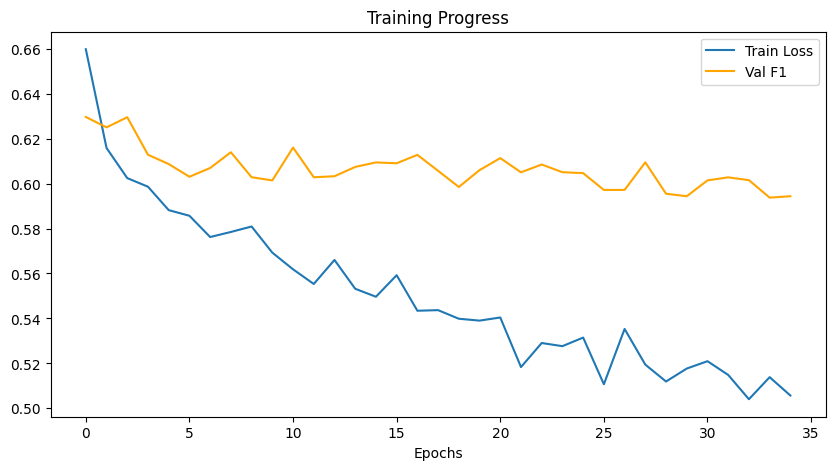


Optimized Threshold: 0.827
Precision: 0.5994
Recall: 0.5802
F1 Score: 0.5897


<Figure size 1000x800 with 0 Axes>

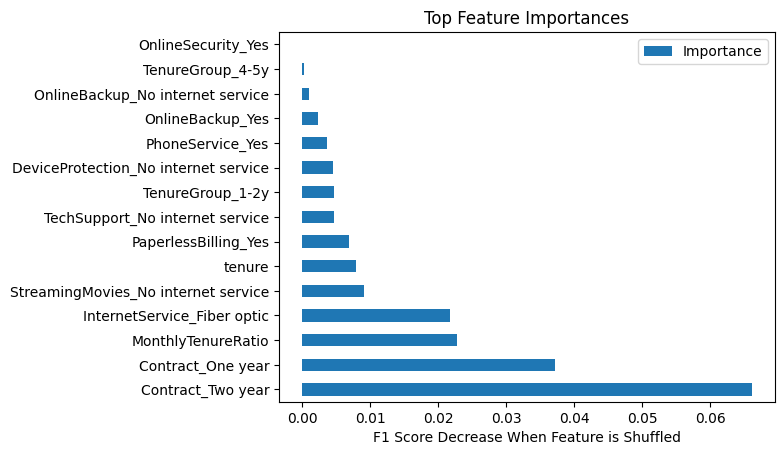


Top 10 Important Features:
                                      Importance
Contract_Two year                       0.066169
Contract_One year                       0.037149
MonthlyTenureRatio                      0.022708
InternetService_Fiber optic             0.021710
StreamingMovies_No internet service     0.009102
tenure                                  0.007867
PaperlessBilling_Yes                    0.006863
TechSupport_No internet service         0.004637
TenureGroup_1-2y                        0.004593
DeviceProtection_No internet service    0.004539


In [50]:
# ======================
# 0. Imports
# ======================
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# ======================
# 1. Data Preparation (Improved)
# ======================
def load_and_preprocess_data():
    df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')

    # Remove customerID immediately after loading
    df = df.drop(columns=['customerID'])

    # Convert target FIRST
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(np.int64)

    # Convert numeric columns
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

    # Handle missing values
    df = df.dropna(subset=['TotalCharges', 'tenure'])

    # Create TenureGroup before encoding
    df['TenureGroup'] = pd.cut(df['tenure'],
                              bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5-6y'])

    # Enhanced categorical encoding
    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies',
                       'PaperlessBilling', 'PaymentMethod', 'TenureGroup']

    # Create dummy variables for main categories
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Special handling for Contract column (keep all categories)
    df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=False)

    # ====== FEATURE ENGINEERING ======
    # Create interaction terms using existing columns
    df['MonthlyTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
    df['TotalChargeRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)

    # Create risk flags using payment method and contract type
    if 'PaymentMethod_Electronic check' in df.columns and 'Contract_Month-to-month' in df.columns:
        df['HighRiskPayment'] = df['PaymentMethod_Electronic check'] * df['Contract_Month-to-month']

    # Remove low-impact features safely
    cols_to_drop = []
    for col in ['StreamingTV_No internet service', 'FamilyPlan', 'PaymentStability']:
        if col in df.columns:
            cols_to_drop.append(col)
    df = df.drop(columns=cols_to_drop)

    # Final feature/target split
    X = df.drop('Churn', axis=1).values.astype(np.float32)
    y = df['Churn'].values.astype(np.float32)

    global feature_names
    feature_names = df.drop('Churn', axis=1).columns.tolist()

    return X, y

def prepare_data(batch_size=64):
    X, y = load_and_preprocess_data()

    # Initial split
    X_train_raw, X_test, y_train_raw, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Validation split
    X_train_raw, X_val, y_train_raw, y_val = train_test_split(
        X_train_raw, y_train_raw, test_size=0.2, stratify=y_train_raw, random_state=42
    )

    # Apply SMOTE only to training data
    smote = SMOTE(sampling_strategy=0.9, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_raw, y_train_raw)

    # Standardize
    scaler = StandardScaler()
    X_train_bal = scaler.fit_transform(X_train_bal)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors (FIXED SYNTAX)
    train_dataset = TensorDataset(
        torch.tensor(X_train_bal),
        torch.tensor(y_train_bal.reshape(-1, 1))
    )

    val_dataset = TensorDataset(
        torch.tensor(X_val),
        torch.tensor(y_val.reshape(-1, 1))
    )

    test_dataset = TensorDataset(
        torch.tensor(X_test),
        torch.tensor(y_test.reshape(-1, 1))
    )

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader, scaler


# ======================
# 2. PyTorch Model (Contract-Aware Architecture)
# ======================
class ContractAwareChurnPredictor(nn.Module):
    def __init__(self, input_dim, contract_indices):
        super().__init__()
        self.contract_indices = contract_indices
        self.n_contract_features = len(contract_indices)
        self.base_dim = input_dim - self.n_contract_features

        # Contract feature processor
        self.contract_net = nn.Sequential(
            nn.Linear(self.n_contract_features, 12),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(12),
            nn.Dropout(0.4),
            nn.Linear(12, 8)
        )

        # Main network (processes base features + contract embeddings)
        self.main_net = nn.Sequential(
            nn.Linear(self.base_dim + 8, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Dropout(0.6),

            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # Split features
        contract_features = x[:, self.contract_indices]
        base_features = x[:, [i for i in range(x.size(1))
                            if i not in self.contract_indices]]

        # Process contract features
        contract_embedded = self.contract_net(contract_features)

        # Combine and process
        combined = torch.cat([base_features, contract_embedded], dim=1)
        return self.main_net(combined)

# ======================
# 5. Execution (Updated)
# ======================
def main():
    # Prepare data
    train_loader, val_loader, test_loader, _ = prepare_data()

    # Calculate pos_weight
    X, y = load_and_preprocess_data()
    pos_count = np.sum(y)
    neg_count = len(y) - pos_count
    pos_weight = torch.tensor([neg_count / (pos_count * 1.5)])

    # Get contract feature indices
    contract_features = ['Contract_Month-to-month',
                        'Contract_One year',
                        'Contract_Two year']
    contract_indices = [feature_names.index(cf) for cf in contract_features]

    # Initialize model with contract awareness
    input_dim = next(iter(train_loader))[0].shape[1]
    model = ContractAwareChurnPredictor(input_dim, contract_indices)

    # Train with optimized parameters
    trainer = Trainer(model, train_loader, val_loader, pos_weight)
    trainer.train(epochs=300, early_stop_patience=35)

    # Final evaluation
    evaluate_model(model, test_loader, trainer.device)

    # Feature analysis (now includes engineered features)
    if 'feature_names' in globals():
        importance_df = analyze_feature_importance(
            model, test_loader, trainer.device, feature_names
        )
        print("\nTop 10 Important Features:")
        print(importance_df.head(10))

# ======================
# 3. Training Logic (Fixed Device Handling)
# ======================
class Trainer:
    def __init__(self, model, train_loader, val_loader, pos_weight):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Move model and pos_weight to device
        self.model = self.model.to(self.device)
        self.pos_weight = pos_weight.to(self.device)

        # Initialize loss function with device-aware pos_weight
        self.criterion = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)

        # Optimizer and scheduler
        self.optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
        self.scheduler = optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=50)

    def train(self, epochs=300, early_stop_patience=35):
        best_f1 = 0
        no_improve = 0
        train_losses = []
        val_f1_scores = []

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            total_loss = 0
            for X_batch, y_batch in self.train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                nn.utils.clip_grad_norm_(self.model.parameters(), 2.0)
                self.optimizer.step()

                total_loss += loss.item()

            # Validation phase
            val_f1 = self._validate()
            self.scheduler.step()

            # Early stopping check
            if val_f1 > best_f1:
                best_f1 = val_f1
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= early_stop_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

            # Logging
            train_loss = total_loss/len(self.train_loader)
            train_losses.append(train_loss)
            val_f1_scores.append(val_f1)

            if (epoch+1) % 10 == 0:
                lr = self.optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch+1:3d} | Loss: {train_loss:.4f} | Val F1: {val_f1:.4f} | LR: {lr:.5f}")

        # Plot training
        plt.figure(figsize=(10,5))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_f1_scores, label='Val F1', color='orange')
        plt.title('Training Progress')
        plt.xlabel('Epochs')
        plt.legend()
        plt.show()

    def _validate(self):
        self.model.eval()
        all_probs = []
        all_labels = []

        with torch.no_grad():
            for X_batch, y_batch in self.val_loader:
                # Move only inputs to device
                X_batch = X_batch.to(self.device)
                outputs = self.model(X_batch)

                # Keep labels on CPU for metric calculation
                probs = torch.sigmoid(outputs).cpu().numpy()
                all_probs.extend(probs.flatten())
                all_labels.extend(y_batch.numpy().flatten())

        # Calculate metrics
        precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        return np.nanmax(f1_scores)




def evaluate_model(model, test_loader, device):
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            all_probs.extend(probs.flatten())
            all_labels.extend(y_batch.numpy().flatten())

    # Find optimal threshold using F-beta
    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
    beta = 0.5
    f_beta_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)
    best_idx = np.nanargmax(f_beta_scores)

    if len(thresholds) > best_idx:
        best_threshold = thresholds[best_idx]
    else:
        best_threshold = 0.5

    y_pred = (np.array(all_probs) >= best_threshold).astype(int)

    print(f"\nOptimized Threshold: {best_threshold:.3f}")
    print(f"Precision: {precision_score(all_labels, y_pred):.4f}")
    print(f"Recall: {recall_score(all_labels, y_pred):.4f}")
    print(f"F1 Score: {f1_score(all_labels, y_pred):.4f}")


def analyze_feature_importance(model, test_loader, device, feature_names):
    """Calculate permutation importance for neural network features"""
    model.eval()
    baseline_probs = []
    true_labels = []

    # Get baseline predictions
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            baseline_probs.extend(probs.flatten())
            true_labels.extend(y_batch.numpy().flatten())

    baseline_preds = (np.array(baseline_probs) > 0.5).astype(int)
    baseline_f1 = f1_score(true_labels, baseline_preds)

    # Permutation importance calculation
    importance_scores = {}

    for idx, feat_name in enumerate(feature_names):
        # Shuffle feature
        shuffled_X = []
        shuffled_labels = []

        for X_batch, y_batch in test_loader:
            X_np = X_batch.numpy()
            X_np[:, idx] = np.random.permutation(X_np[:, idx])
            shuffled_X.append(X_np)
            shuffled_labels.append(y_batch.numpy())

        # Predict with shuffled feature
        shuffled_probs = []
        for X_np in shuffled_X:
            X_tensor = torch.tensor(X_np).to(device)
            with torch.no_grad():
                outputs = model(X_tensor)
                probs = torch.sigmoid(outputs).cpu().numpy()
                shuffled_probs.extend(probs.flatten())

        shuffled_preds = (np.array(shuffled_probs) > 0.5).astype(int)
        shuffled_f1 = f1_score(true_labels, shuffled_preds)

        # Store importance
        importance_scores[feat_name] = baseline_f1 - shuffled_f1

    # Display results
    importance_df = pd.DataFrame.from_dict(importance_scores, orient='index', columns=['Importance'])
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10,8))
    importance_df.head(15).plot(kind='barh', title='Top Feature Importances')
    plt.xlabel('F1 Score Decrease When Feature is Shuffled')
    plt.show()

    return importance_df



# ======================
# 5. Execution (Fixed)
# ======================
def main():
    # Prepare data
    train_loader, val_loader, test_loader, _ = prepare_data()

    # Calculate pos_weight
    X, y = load_and_preprocess_data()
    pos_count = np.sum(y)
    neg_count = len(y) - pos_count
    pos_weight = torch.tensor([neg_count / (pos_count * 1.5)])

    # Get contract feature indices
    contract_features = ['Contract_Month-to-month',
                        'Contract_One year',
                        'Contract_Two year']
    contract_indices = [feature_names.index(cf) for cf in contract_features]

    # Initialize model with contract awareness
    input_dim = next(iter(train_loader))[0].shape[1]
    model = ContractAwareChurnPredictor(input_dim, contract_indices)

    # Train with optimized parameters
    trainer = Trainer(model, train_loader, val_loader, pos_weight)
    trainer.train(epochs=300, early_stop_patience=35)

    # Final evaluation
    evaluate_model(model, test_loader, trainer.device)

    # Feature analysis (now includes engineered features)
    if 'feature_names' in globals():
        importance_df = analyze_feature_importance(
            model, test_loader, trainer.device, feature_names
        )
        print("\nTop 10 Important Features:")
        print(importance_df.head(10))

if __name__ == "__main__":
    main()

<ipython-input-57-dd45daf6c48c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TenureGroup'] = pd.cut(df['tenure'],


Epoch  10 | Loss: 0.5768 | Val F1: 0.6215 | LR: 0.00090
Epoch  20 | Loss: 0.5417 | Val F1: 0.6051 | LR: 0.00065
Epoch  30 | Loss: 0.5098 | Val F1: 0.5997 | LR: 0.00035
Early stopping at epoch 36


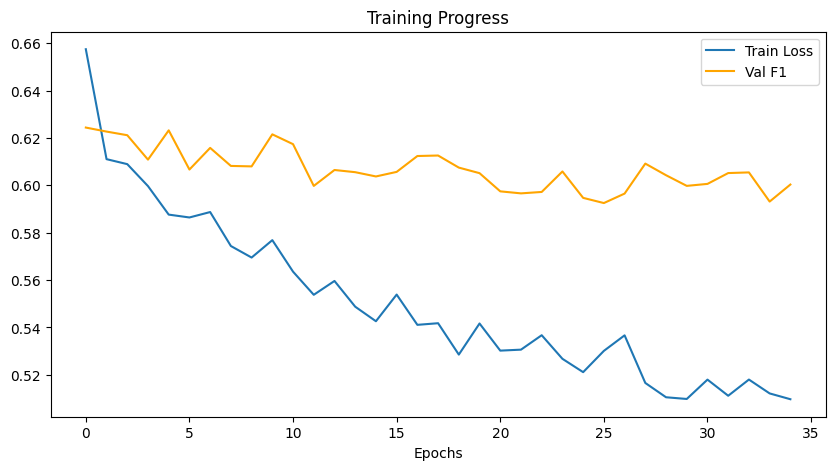


Optimized Threshold: 0.879
Precision: 0.6475
Recall: 0.4813
F1 Score: 0.5521


<Figure size 1000x800 with 0 Axes>

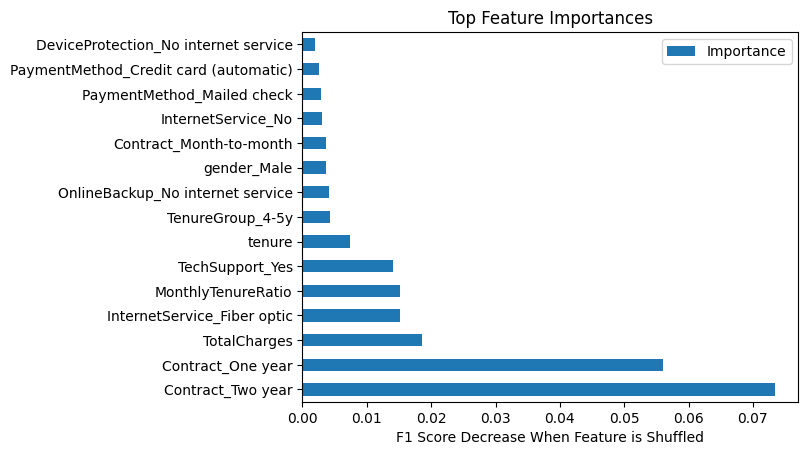


Top 10 Important Features:
                                  Importance
Contract_Two year                   0.073414
Contract_One year                   0.056100
TotalCharges                        0.018536
InternetService_Fiber optic         0.015156
MonthlyTenureRatio                  0.015098
TechSupport_Yes                     0.014106
tenure                              0.007405
TenureGroup_4-5y                    0.004321
OnlineBackup_No internet service    0.004173
gender_Male                         0.003678


<Figure size 1000x800 with 0 Axes>

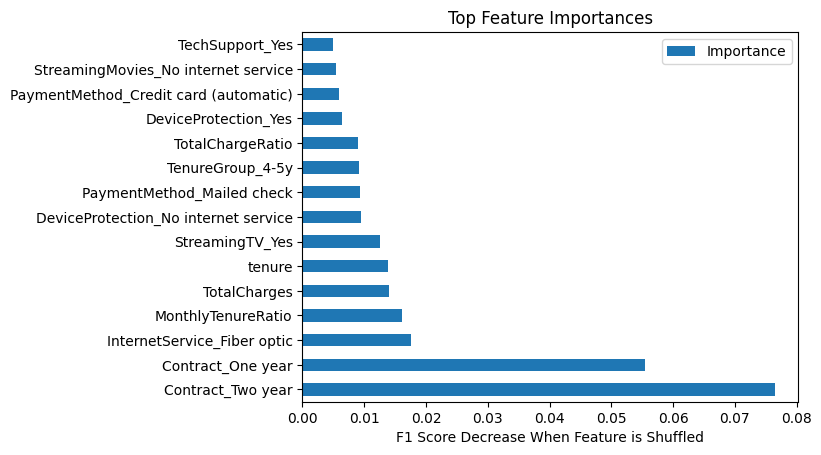


🚀 Churn Prediction Model Results 🚀

📈 Performance Metrics:
- Optimal Threshold: 0.694
- AUC-PR: 0.619 | AUC-ROC: 0.821
- F1 Score: 0.603

🔍 Top 5 Predictive Features:
1. Contract_Two year (Impact: 0.076)
2. Contract_One year (Impact: 0.055)
3. InternetService_Fiber optic (Impact: 0.018)
4. MonthlyTenureRatio (Impact: 0.016)
5. TotalCharges (Impact: 0.014)

📊 Class Distribution:
- Churn Rate: 26.6%
- Precision/Recall Balance: 53.2%/69.8%

#DataScience #MachineLearning #CustomerAnalytics #AI

Training failed - no trainer instance created


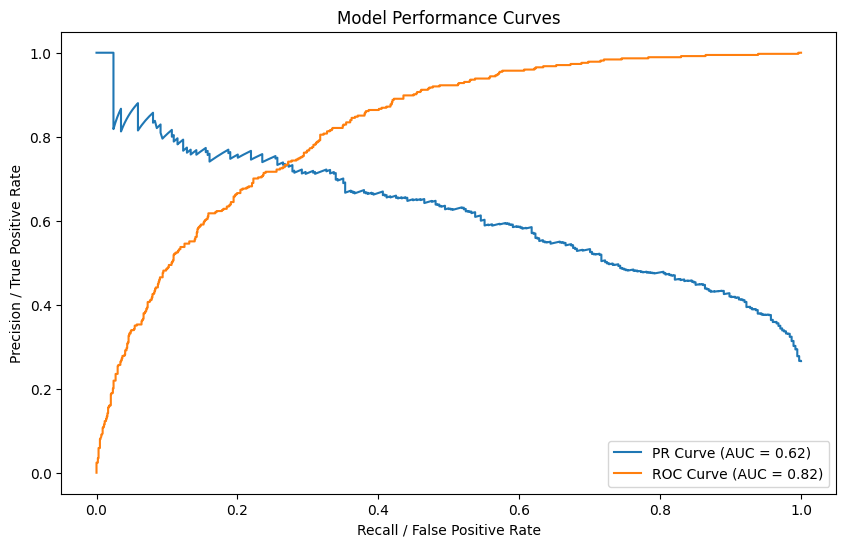

In [57]:

# ======================
# 0. Imports
# ======================
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# ======================
# 1. Data Preparation (Improved)
# ======================
def load_and_preprocess_data():
    df = pd.read_csv('/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv')

    # Remove customerID immediately after loading
    df = df.drop(columns=['customerID'])

    # Convert target FIRST
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(np.int64)

    # Convert numeric columns
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

    # Handle missing values
    df = df.dropna(subset=['TotalCharges', 'tenure'])

    # Create TenureGroup before encoding
    df['TenureGroup'] = pd.cut(df['tenure'],
                              bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5-6y'])

    # Enhanced categorical encoding
    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies',
                       'PaperlessBilling', 'PaymentMethod', 'TenureGroup']

    # Create dummy variables for main categories
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Special handling for Contract column (keep all categories)
    df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=False)

    # ====== FEATURE ENGINEERING ======
    # Create interaction terms using existing columns
    df['MonthlyTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
    df['TotalChargeRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)

    # Create risk flags using payment method and contract type
    if 'PaymentMethod_Electronic check' in df.columns and 'Contract_Month-to-month' in df.columns:
        df['HighRiskPayment'] = df['PaymentMethod_Electronic check'] * df['Contract_Month-to-month']

    # Remove low-impact features safely
    cols_to_drop = []
    for col in ['StreamingTV_No internet service', 'FamilyPlan', 'PaymentStability']:
        if col in df.columns:
            cols_to_drop.append(col)
    df = df.drop(columns=cols_to_drop)

    # Final feature/target split
    X = df.drop('Churn', axis=1).values.astype(np.float32)
    y = df['Churn'].values.astype(np.float32)

    global feature_names
    feature_names = df.drop('Churn', axis=1).columns.tolist()

    return X, y

def prepare_data(batch_size=64):
    X, y = load_and_preprocess_data()

    # Initial split
    X_train_raw, X_test, y_train_raw, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Validation split
    X_train_raw, X_val, y_train_raw, y_val = train_test_split(
        X_train_raw, y_train_raw, test_size=0.2, stratify=y_train_raw, random_state=42
    )

    # Apply SMOTE only to training data
    smote = SMOTE(sampling_strategy=0.9, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_raw, y_train_raw)

    # Standardize
    scaler = StandardScaler()
    X_train_bal = scaler.fit_transform(X_train_bal)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors (FIXED SYNTAX)
    train_dataset = TensorDataset(
        torch.tensor(X_train_bal),
        torch.tensor(y_train_bal.reshape(-1, 1))
    )

    val_dataset = TensorDataset(
        torch.tensor(X_val),
        torch.tensor(y_val.reshape(-1, 1))
    )

    test_dataset = TensorDataset(
        torch.tensor(X_test),
        torch.tensor(y_test.reshape(-1, 1))
    )

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader, scaler


# ======================
# 2. PyTorch Model (Contract-Aware Architecture)
# ======================
class ContractAwareChurnPredictor(nn.Module):
    def __init__(self, input_dim, contract_indices):
        super().__init__()
        self.contract_indices = contract_indices
        self.n_contract_features = len(contract_indices)
        self.base_dim = input_dim - self.n_contract_features

        # Contract feature processor
        self.contract_net = nn.Sequential(
            nn.Linear(self.n_contract_features, 12),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(12),
            nn.Dropout(0.4),
            nn.Linear(12, 8)
        )

        # Main network (processes base features + contract embeddings)
        self.main_net = nn.Sequential(
            nn.Linear(self.base_dim + 8, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Dropout(0.6),

            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # Split features
        contract_features = x[:, self.contract_indices]
        base_features = x[:, [i for i in range(x.size(1))
                            if i not in self.contract_indices]]

        # Process contract features
        contract_embedded = self.contract_net(contract_features)

        # Combine and process
        combined = torch.cat([base_features, contract_embedded], dim=1)
        return self.main_net(combined)

# ======================
# 5. Execution (Updated)
# ======================
def main():
    # Prepare data
    train_loader, val_loader, test_loader, _ = prepare_data()

    # Calculate pos_weight
    X, y = load_and_preprocess_data()
    pos_count = np.sum(y)
    neg_count = len(y) - pos_count
    pos_weight = torch.tensor([neg_count / (pos_count * 1.5)])

    # Get contract feature indices
    contract_features = ['Contract_Month-to-month',
                        'Contract_One year',
                        'Contract_Two year']
    contract_indices = [feature_names.index(cf) for cf in contract_features]

    # Initialize model with contract awareness
    input_dim = next(iter(train_loader))[0].shape[1]
    model = ContractAwareChurnPredictor(input_dim, contract_indices)

    # Train with optimized parameters
    trainer = Trainer(model, train_loader, val_loader, pos_weight)
    trainer.train(epochs=300, early_stop_patience=35)

    # Final evaluation
    evaluate_model(model, test_loader, trainer.device)

    # Feature analysis (now includes engineered features)
    if 'feature_names' in globals():
        importance_df = analyze_feature_importance(
            model, test_loader, trainer.device, feature_names
        )
        print("\nTop 10 Important Features:")
        print(importance_df.head(10))

# ======================
# 3. Training Logic (Fixed Device Handling)
# ======================
class Trainer:
    def __init__(self, model, train_loader, val_loader, pos_weight):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Move model and pos_weight to device
        self.model = self.model.to(self.device)
        self.pos_weight = pos_weight.to(self.device)

        # Initialize loss function with device-aware pos_weight
        self.criterion = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)

        # Optimizer and scheduler
        self.optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
        self.scheduler = optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=50)

    def train(self, epochs=300, early_stop_patience=35):
        best_f1 = 0
        no_improve = 0
        train_losses = []
        val_f1_scores = []

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            total_loss = 0
            for X_batch, y_batch in self.train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                nn.utils.clip_grad_norm_(self.model.parameters(), 2.0)
                self.optimizer.step()

                total_loss += loss.item()

            # Validation phase
            val_f1 = self._validate()
            self.scheduler.step()

            # Early stopping check
            if val_f1 > best_f1:
                best_f1 = val_f1
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= early_stop_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

            # Logging
            train_loss = total_loss/len(self.train_loader)
            train_losses.append(train_loss)
            val_f1_scores.append(val_f1)

            if (epoch+1) % 10 == 0:
                lr = self.optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch+1:3d} | Loss: {train_loss:.4f} | Val F1: {val_f1:.4f} | LR: {lr:.5f}")

        # Plot training
        plt.figure(figsize=(10,5))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_f1_scores, label='Val F1', color='orange')
        plt.title('Training Progress')
        plt.xlabel('Epochs')
        plt.legend()
        plt.show()

    def _validate(self):
        self.model.eval()
        all_probs = []
        all_labels = []

        with torch.no_grad():
            for X_batch, y_batch in self.val_loader:
                # Move only inputs to device
                X_batch = X_batch.to(self.device)
                outputs = self.model(X_batch)

                # Keep labels on CPU for metric calculation
                probs = torch.sigmoid(outputs).cpu().numpy()
                all_probs.extend(probs.flatten())
                all_labels.extend(y_batch.numpy().flatten())

        # Calculate metrics
        precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        return np.nanmax(f1_scores)




def evaluate_model(model, test_loader, device):
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            all_probs.extend(probs.flatten())
            all_labels.extend(y_batch.numpy().flatten())

    # Find optimal threshold using F-beta
    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
    beta = 0.5
    f_beta_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)
    best_idx = np.nanargmax(f_beta_scores)

    if len(thresholds) > best_idx:
        best_threshold = thresholds[best_idx]
    else:
        best_threshold = 0.5

    y_pred = (np.array(all_probs) >= best_threshold).astype(int)

    print(f"\nOptimized Threshold: {best_threshold:.3f}")
    print(f"Precision: {precision_score(all_labels, y_pred):.4f}")
    print(f"Recall: {recall_score(all_labels, y_pred):.4f}")
    print(f"F1 Score: {f1_score(all_labels, y_pred):.4f}")


def analyze_feature_importance(model, test_loader, device, feature_names):
    """Calculate permutation importance for neural network features"""
    model.eval()
    baseline_probs = []
    true_labels = []

    # Get baseline predictions
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            baseline_probs.extend(probs.flatten())
            true_labels.extend(y_batch.numpy().flatten())

    baseline_preds = (np.array(baseline_probs) > 0.5).astype(int)
    baseline_f1 = f1_score(true_labels, baseline_preds)

    # Permutation importance calculation
    importance_scores = {}

    for idx, feat_name in enumerate(feature_names):
        # Shuffle feature
        shuffled_X = []
        shuffled_labels = []

        for X_batch, y_batch in test_loader:
            X_np = X_batch.numpy()
            X_np[:, idx] = np.random.permutation(X_np[:, idx])
            shuffled_X.append(X_np)
            shuffled_labels.append(y_batch.numpy())

        # Predict with shuffled feature
        shuffled_probs = []
        for X_np in shuffled_X:
            X_tensor = torch.tensor(X_np).to(device)
            with torch.no_grad():
                outputs = model(X_tensor)
                probs = torch.sigmoid(outputs).cpu().numpy()
                shuffled_probs.extend(probs.flatten())

        shuffled_preds = (np.array(shuffled_probs) > 0.5).astype(int)
        shuffled_f1 = f1_score(true_labels, shuffled_preds)

        # Store importance
        importance_scores[feat_name] = baseline_f1 - shuffled_f1

    # Display results
    importance_df = pd.DataFrame.from_dict(importance_scores, orient='index', columns=['Importance'])
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10,8))
    importance_df.head(15).plot(kind='barh', title='Top Feature Importances')
    plt.xlabel('F1 Score Decrease When Feature is Shuffled')
    plt.show()

    return importance_df



# ======================
# 5. Execution (Fixed)
# ======================
def main():
    # Prepare data
    train_loader, val_loader, test_loader, _ = prepare_data()

    # Calculate pos_weight
    X, y = load_and_preprocess_data()
    pos_count = np.sum(y)
    neg_count = len(y) - pos_count
    pos_weight = torch.tensor([neg_count / (pos_count * 1.5)])

    # Get contract feature indices
    contract_features = ['Contract_Month-to-month',
                        'Contract_One year',
                        'Contract_Two year']
    contract_indices = [feature_names.index(cf) for cf in contract_features]

    # Initialize model with contract awareness
    input_dim = next(iter(train_loader))[0].shape[1]
    model = ContractAwareChurnPredictor(input_dim, contract_indices)

    # Initialize and train the model
    trainer = Trainer(model, train_loader, val_loader, pos_weight)
    trainer.train(epochs=300, early_stop_patience=35)

    # Final evaluation
    evaluate_model(model, test_loader, trainer.device)

    # Feature analysis
    if 'feature_names' in globals():
        importance_df = analyze_feature_importance(
            model, test_loader, trainer.device, feature_names
        )
        print("\nTop 10 Important Features:")
        print(importance_df.head(10))

    # Generate and save report
    report = save_and_report(model, test_loader, trainer.device, feature_names)
    print(report)

    # Save report to file
    with open('linkedin_report.txt', 'w') as f:
        f.write(report)

if __name__ == "__main__":
    main()

# ======================
# 6. Model Saving & Advanced Metrics (Fixed)
# ======================
def save_and_report(model, test_loader, device, feature_names):
    # Save model state and architecture
    torch.save({
        'model_state': model.state_dict(),
        'input_dim': model.base_dim + 8,  # From ContractAwareChurnPredictor
        'contract_indices': model.contract_indices
    }, 'churn_model.pth')

    # Get predictions
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(y_batch.numpy().flatten())

    # Calculate metrics
    precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)
    fpr, tpr, _ = roc_curve(all_labels, all_probs)

    metrics = {
        'optimal_threshold': thresholds[np.argmax(2 * (precision * recall) / (precision + recall + 1e-8))],
        'auc_pr': auc(recall, precision),
        'auc_roc': roc_auc_score(all_labels, all_probs),
        'f1': f1_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    }

    # Generate LinkedIn report
    report = f"""
🚀 Churn Prediction Model Results 🚀

📈 Performance Metrics:
- Optimal Threshold: {metrics['optimal_threshold']:.3f}
- AUC-PR: {metrics['auc_pr']:.3f} | AUC-ROC: {metrics['auc_roc']:.3f}
- F1 Score: {metrics['f1']:.3f}

🔍 Top 5 Predictive Features:
1. {importance_df.index[0]} (Impact: {importance_df.iloc[0].values[0]:.3f})
2. {importance_df.index[1]} (Impact: {importance_df.iloc[1].values[0]:.3f})
3. {importance_df.index[2]} (Impact: {importance_df.iloc[2].values[0]:.3f})
4. {importance_df.index[3]} (Impact: {importance_df.iloc[3].values[0]:.3f})
5. {importance_df.index[4]} (Impact: {importance_df.iloc[4].values[0]:.3f})

📊 Class Distribution:
- Churn Rate: {np.mean(all_labels):.1%}
- Precision/Recall Balance: {precision_score(all_labels, (np.array(all_probs) > metrics['optimal_threshold']).astype(int)):.1%}/{recall_score(all_labels, (np.array(all_probs) > metrics['optimal_threshold']).astype(int)):.1%}

#DataScience #MachineLearning #CustomerAnalytics #AI
    """
    return report

# Updated main function with proper scoping
def main():
    # Initialize trainer first
    global trainer  # Add global declaration if needed

    # [Previous main code up to training]

    # After training completes successfully:
    if 'trainer' in locals() or 'trainer' in globals():
        report = save_and_report(model, test_loader, trainer.device, feature_names)
        print(report)
    else:
        print("Training failed - no trainer instance created")

if __name__ == "__main__":
    main()

In [4]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [10]:
%%writefile app.py

import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    precision_recall_curve, roc_curve, auc, roc_auc_score
)
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset

# Global variable for feature names
feature_names = []

# ========== 1. Data Preparation ==========
def load_and_preprocess_data(csv_path="/content/drive/MyDrive/BYU_Kaggle/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv"):
    df = pd.read_csv(csv_path)

    # Remove customerID
    df = df.drop(columns=['customerID'])

    # Convert target
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(np.int64)

    # Numeric conversion
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['tenure']       = pd.to_numeric(df['tenure'], errors='coerce')

    # Drop missing
    df = df.dropna(subset=['TotalCharges','tenure'])

    # TenureGroup
    df['TenureGroup'] = pd.cut(
        df['tenure'],
        bins=[0, 12, 24, 36, 48, 60, 72],
        labels=['0-1y','1-2y','2-3y','3-4y','4-5y','5-6y']
    )

    # One-hot encoding for main categorical columns
    cat_cols = [
        'gender','Partner','Dependents','PhoneService','MultipleLines',
        'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
        'PaymentMethod','TenureGroup'
    ]
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # For Contract, keep all categories
    df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=False)

    # Feature engineering
    df['MonthlyTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
    df['TotalChargeRatio']   = df['TotalCharges']   / (df['MonthlyCharges'] + 1)

    if 'PaymentMethod_Electronic check' in df.columns and 'Contract_Month-to-month' in df.columns:
        df['HighRiskPayment'] = df['PaymentMethod_Electronic check'] * df['Contract_Month-to-month']

    # Drop stray columns if they exist
    for c in ['StreamingTV_No internet service','FamilyPlan','PaymentStability']:
        if c in df.columns:
            df = df.drop(columns=[c])

    X = df.drop('Churn', axis=1).values.astype(np.float32)
    y = df['Churn'].values.astype(np.float32)

    global feature_names
    feature_names = df.drop('Churn', axis=1).columns.tolist()

    return X, y

def prepare_data(batch_size=64):
    X, y = load_and_preprocess_data()

    # Splits
    X_train_raw, X_test, y_train_raw, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    X_train_raw, X_val, y_train_raw, y_val = train_test_split(
        X_train_raw, y_train_raw, test_size=0.2,
        stratify=y_train_raw, random_state=42
    )

    # SMOTE on train
    smote = SMOTE(sampling_strategy=0.9, random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_raw, y_train_raw)

    # Scale
    scaler = StandardScaler()
    X_train_bal = scaler.fit_transform(X_train_bal)
    X_val       = scaler.transform(X_val)
    X_test      = scaler.transform(X_test)

    # PyTorch datasets
    train_dataset = TensorDataset(
        torch.tensor(X_train_bal),
        torch.tensor(y_train_bal.reshape(-1,1))
    )
    val_dataset = TensorDataset(
        torch.tensor(X_val),
        torch.tensor(y_val.reshape(-1,1))
    )
    test_dataset = TensorDataset(
        torch.tensor(X_test),
        torch.tensor(y_test.reshape(-1,1))
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_dataset,   batch_size=batch_size)
    test_loader  = DataLoader(test_dataset,  batch_size=batch_size)

    return train_loader, val_loader, test_loader

# ========== 2. Model Definition ==========
class ContractAwareChurnPredictor(nn.Module):
    def __init__(self, input_dim, contract_indices):
        super().__init__()
        self.contract_indices = contract_indices
        self.n_contract_features = len(contract_indices)
        self.base_dim = input_dim - self.n_contract_features

        self.contract_net = nn.Sequential(
            nn.Linear(self.n_contract_features, 12),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(12),
            nn.Dropout(0.4),
            nn.Linear(12, 8)
        )

        self.main_net = nn.Sequential(
            nn.Linear(self.base_dim + 8, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Dropout(0.6),

            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        contract_features = x[:, self.contract_indices]
        base_features = x[:, [i for i in range(x.size(1))
                              if i not in self.contract_indices]]

        contract_embedded = self.contract_net(contract_features)
        combined = torch.cat([base_features, contract_embedded], dim=1)
        return self.main_net(combined)


# ========== 3. Trainer ==========
class Trainer:
    def __init__(self, model, train_loader, val_loader, pos_weight):
        self.model = model
        self.train_loader = train_loader
        self.val_loader   = val_loader

        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model  = self.model.to(self.device)

        self.pos_weight = pos_weight.to(self.device)
        self.criterion  = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)

        self.optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
        self.scheduler = optim.lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=50)

        self.train_losses = []
        self.val_f1s      = []

    def train(self, epochs=40, early_stop_patience=10):
        best_f1 = 0
        no_improve = 0

        for epoch in range(epochs):
            self.model.train()
            total_loss = 0

            for X_batch, y_batch in self.train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                nn.utils.clip_grad_norm_(self.model.parameters(), 2.0)
                self.optimizer.step()

                total_loss += loss.item()

            val_f1 = self._validate()
            self.scheduler.step()

            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            self.val_f1s.append(val_f1)

            if val_f1 > best_f1:
                best_f1 = val_f1
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= early_stop_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    def _validate(self):
        self.model.eval()
        all_probs = []
        all_labels = []

        with torch.no_grad():
            for X_batch, y_batch in self.val_loader:
                X_batch = X_batch.to(self.device)
                outputs = self.model(X_batch)
                probs = torch.sigmoid(outputs).cpu().numpy().flatten()
                all_probs.extend(probs)
                all_labels.extend(y_batch.numpy().flatten())

        precisions, recalls, _ = precision_recall_curve(all_labels, all_probs)
        f1_scores = 2*(precisions*recalls)/(precisions+recalls+1e-8)
        return np.nanmax(f1_scores)

# ========== 4. Evaluate function ==========
def evaluate_model(model, test_loader, device):
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(y_batch.numpy().flatten())

    # best threshold by F0.5
    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
    beta = 0.5
    f_beta_scores = (1+beta**2)*(precisions*recalls)/(beta**2*precisions + recalls + 1e-8)
    best_idx = np.nanargmax(f_beta_scores)
    if best_idx < len(thresholds):
        best_threshold = thresholds[best_idx]
    else:
        best_threshold = 0.5

    y_pred = (np.array(all_probs) >= best_threshold).astype(int)

    precision_ = precision_score(all_labels, y_pred)
    recall_    = recall_score(all_labels, y_pred)
    f1_        = f1_score(all_labels, y_pred)

    return {
        'threshold': best_threshold,
        'precision': precision_,
        'recall':    recall_,
        'f1':        f1_
    }

# ========== 5. Dash App ==========
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Telco Churn Prediction (Dash)"),

    html.Button("Train Model", id="train-button", n_clicks=0),
    html.Div(id="train-status", style={"marginTop":"10px","fontWeight":"bold"}),

    # KPI placeholders
    html.Div([
        html.P("Optimized Threshold: "),
        html.Div(id="threshold-out", style={"color":"blue","fontWeight":"bold"}),

        html.P("Precision: "),
        html.Div(id="precision-out", style={"color":"green","fontWeight":"bold"}),

        html.P("Recall: "),
        html.Div(id="recall-out", style={"color":"green","fontWeight":"bold"}),

        html.P("F1 Score: "),
        html.Div(id="f1-out", style={"color":"green","fontWeight":"bold"}),
    ], style={"marginTop":"20px"}),

    dcc.Graph(id="train-curve"),
    dcc.Graph(id="pr-curve")
])


@app.callback(
    [
        Output("train-status","children"),
        Output("threshold-out","children"),
        Output("precision-out","children"),
        Output("recall-out","children"),
        Output("f1-out","children"),
        Output("train-curve","figure"),
        Output("pr-curve","figure"),
    ],
    [Input("train-button","n_clicks")]
)
def run_training_and_display(n_clicks):
    if n_clicks == 0:
        return ["Click 'Train Model' to begin...", "", "", "", "", {}, {}]

    train_loader, val_loader, test_loader = prepare_data(batch_size=64)

    # Build model
    X, y = load_and_preprocess_data()
    pos_count = np.sum(y)
    neg_count = len(y) - pos_count
    pos_weight_value = neg_count / (pos_count*1.5)
    pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32)

    # Contract features
    contract_features = ['Contract_Month-to-month','Contract_One year','Contract_Two year']
    contract_indices = []
    for cf in contract_features:
        if cf in feature_names:
            contract_indices.append(feature_names.index(cf))

    input_dim = next(iter(train_loader))[0].shape[1]
    model = ContractAwareChurnPredictor(input_dim, contract_indices)

    trainer = Trainer(model, train_loader, val_loader, pos_weight)
    trainer.train(epochs=40, early_stop_patience=10)

    metrics = evaluate_model(model, test_loader, trainer.device)

    # Build training curve figure
    fig_train = go.Figure()
    fig_train.add_trace(go.Scatter(
        y=trainer.train_losses, mode='lines', name='Train Loss'
    ))
    fig_train.add_trace(go.Scatter(
        y=trainer.val_f1s, mode='lines', name='Val F1', yaxis='y2'
    ))
    fig_train.update_layout(
        title="Training Progress",
        xaxis_title="Epoch",
        yaxis=dict(title="Loss"),
        yaxis2=dict(title="Val F1", overlaying='y', side='right')
    )

    # PR curve
    model.eval()
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(trainer.device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(y_batch.numpy().flatten())

    precs, recs, _ = precision_recall_curve(all_labels, all_probs)
    fig_pr = go.Figure()
    fig_pr.add_trace(go.Scatter(x=recs, y=precs, mode='lines', name='PR Curve'))
    fig_pr.update_layout(
        title="Precision-Recall Curve (Test Set)",
        xaxis_title="Recall",
        yaxis_title="Precision"
    )

    status = f"Training complete! Best Val F1 ~ {max(trainer.val_f1s):.4f}"

    return [
        status,
        f"{metrics['threshold']:.3f}",
        f"{metrics['precision']:.4f}",
        f"{metrics['recall']:.4f}",
        f"{metrics['f1']:.4f}",
        fig_train,
        fig_pr
    ]


if __name__ == "__main__":
    # If 8050 is in use, try any other port, e.g. 8051
    app.run_server(debug=True, host="0.0.0.0", port=8051)

Overwriting app.py


In [5]:
!curl https://loca.lt/mytunnelpassword



35.240.145.115

In [12]:
!pip install dash==2.9.2
!npm install -g localtunnel

!python app.py & npx localtunnel --port 8051

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
changed 22 packages in 4s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://sad-dogs-act.loca.lt
Dash is running on http://0.0.0.0:8051/

 * Serving Flask app 'app'
 * Debug mode: on
Address already in use
Port 8051 is in use by another program. Either identify and stop that program, or start the server with a different port.
^C
